<a href="https://colab.research.google.com/github/NRHartFRC/Financial-Analysis-Tool/blob/main/Strategic_Indictators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Strategic Indicators Vol. 1**

#### **Description:** this program will perform a quantatative analysis of a given `tag` or ticker symbol for a given `start` and `end` date using historical price data provided by Yahoo Finance API. The purpose of this program is to identify a reliable trading paradigm for a specific market.

**Author Information:**
- **Name:** Nicholas Rombach
- **GitHub:** [NRHartFRC](https://github.com/nrhartfrc)


## **License**
<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>

# **Summary of Indicators**

1. **Moving Average Convergence Divergence (MACD)**
   - MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price. It is used to identify changes in the strength, direction, momentum, and duration of a trend.

2. **Simple Moving Average (SMA)**
   - SMA calculates the average of a security's price over a specified time period. It is used to smooth out price data and identify trends by eliminating short-term fluctuations.

3. **Exponential Moving Average (EMA)**
   - EMA is a weighted moving average that gives more weight to recent price data, making it more responsive to recent price changes. It is used for trend identification and trend-following strategies.

4. **Double Exponential Moving Average (DEMA)**
   - DEMA is a smoother moving average that reduces lag compared to traditional moving averages. It is used to identify trends and potential trend reversals.

5. **Relative Strength Index or Money Flow Index (RSI/MFI)**
   - RSI measures the speed and change of price movements and is used to identify overbought or oversold conditions in a security. MFI is an oscillator that uses both price and volume data to gauge buying and selling pressure.

6. **On-Balance Volume (OBV and OBV_EMA)**
   - OBV is a momentum indicator that measures buying and selling pressure based on volume changes. OBV_EMA is the exponential moving average of OBV. Both are used to confirm trends and potential reversals. They consider adjusted close prices.

7. **Bollinger Band Analysis (BB)**
   - Bollinger Bands consist of a middle band (SMA) and two outer bands that represent standard deviations from the middle band. They are used to identify volatility and potential price reversal points.

8. **Exponential Moving Average 3X XOver / 3X Leveraged (3X Lever)**
   - The 3X Lever indicator uses exponential moving averages to identify potential entry and exit points for leveraged trading strategies.





## **Table of Contents**

0. [Configuration](#Configuration)
1. [Moving Average Convergence Divergence](#moving-average-convergence-divergence) (MACD)
2. [Simple Moving Average](#Simple-Moving-Average) (SMA)
3. [Exponential Moving Average](#Exponential-Moving-Average) (EMA)
4. [Double Exponential Moving Average](#Double-Exponential-Moving-Average) (DEMA)
5. [Relative Strength Index or Money Flow Index](#Relative-Strength-Index-or-Money-Flow-Index) (RSI/MFI)
6. [On-Balance Volume](#On-Balance-Volume) (OBV and OBV_EMA)
7. [Bollinger Band Analysis](#Bollinger-Bands-Analysis) (BB)
8. [Exponential Moving Average 3X XOver / 3X Leveraged](#Exponential-Moving-Average-3X-XOver-/-3X-Leveraged) (3X Lever)

**User Inputs:**
* `tag` = stock/equity/crypto ticker symbol
* `start` = initial date
* `end` = end date
* `period` = time interval for some indicators

---

**Foreward:** Not all markets behave the same. The objective of this tool is to determine which strategy is properly active. By using empirical analysis, one can use this tool to determine a reliable strategy for a specific market. Some markets will show clear signs that the indicated buy/sell signals are a fallacy. Other markets will align well with the outputted buy/sell signals.

**Usage:** I recommend using the Runtime > Run all for general use.

**Disclaimer:** This is not financial advise. Use at your own risk.



# **0. Configuration** <a name="Configuration"></a>

* check python version
* helper installs/uninstalls
* required installs libraries, and imports

In [1]:
#!python --version

In [2]:
# Helpers (may not be needed)
#!pip show pandas_datareader
#!pip uninstall -y pycryptodome pycryptodomex
#!pip install --upgrade pycryptodome pycryptodomex
#!pip install pandas-datareader
#!pip install git+https://github.com/hellc/pandas-datareader.git@87dda3f297df8f4b3253c6f2d5006b5ac43a9150
#!pip uninstall -y git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316
#!pip install git+https://github.com/raphi6/pandas-datareader.git@ea66d6b981554f9d0262038aef2106dda7138316 #modified pandas-datareader daily.py to decrypt output
#!pip install git+https://github.com/pydata/pandas-datareader.git
#!pip install --upgrade pandas_datareader

In [3]:
# REQUIRED
#!pip uninstall --yes pandas-datareader
#!pip install git+https://github.com/hellc/pandas-datareader.git@87dda3f297df8f4b3253c6f2d5006b5ac43a9150 #Novel AES encryption bypass
#!pip install yfinance
#!pip show pandas_datareader
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [4]:
##libraries
#import pandas as pd
#import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
# Pandas DataReader is now using dispatcher and stores. The store is encrypted (AES), and is outputing string instead of integers -- Fixed 20DEC2022
tag='JOBY' #enter ticker
start = '2023-01-01'
end = '2023-09-19' # use one day ahead of day of interest
#df = pdr.DataReader(tag,data_source='yahoo',start='2021-06-06',end='2023-01-17')
df = pdr.DataReader(tag,start,end)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,3.42,3.5690,3.340,3.4200,3.4200,3564500
2023-01-04,3.44,3.5450,3.379,3.4600,3.4600,1977600
2023-01-05,3.45,3.5000,3.300,3.3100,3.3100,2506800
2023-01-06,3.35,3.3700,3.220,3.3700,3.3700,2381800
2023-01-09,3.43,3.6100,3.390,3.5600,3.5600,2927100
...,...,...,...,...,...,...
2023-09-12,7.20,7.3100,6.980,6.9900,6.9900,3565600
2023-09-13,6.96,7.0450,6.870,6.8800,6.8800,4684700
2023-09-14,6.90,7.0000,6.780,6.9400,6.9400,4972100


#### MACD CALCULATIONS

In [6]:
#function to calculate MACD
def MACD(data,period_long=26,period_short=20,period_signal=9, column='Close'):

  #calculate short term exponential moving average (EMA)
  shortema = EMA(data,period_short,column=column) #mean() #typ 12 period exponentially smooth moving average

  #calculate long term exponential moving average (EMA) #type 26 period exponentially smooth moving average
  longema = EMA(data,period_long,column=column)

  #calculate MACD line and store in dataframe
  data['MACD'] = shortema - longema

  #calculate signal line
  data['Signal Line'] = EMA(data, period_signal, column='MACD') #typ 9 period exponentially smooth moving average

  return data

#### SMC, EMA, DEMA CALCULATIONS

In [7]:
#function to calculate SMA (was period=20)
def SMA(data, period=50, column='Close'):
  return data[column].rolling(window=period).mean()

#function to calculate EMA
def EMA(data,time_period, column='Close'):
  return data[column].ewm(span=time_period,adjust=False).mean()

#function to calculate DEMA
def DEMA(data, time_period, column):
  #calculate EMA for some time period
  ema = data[column].ewm(span=time_period,adjust=False).mean()
  #calculate the DEMA
  dema = 2*ema-ema.ewm(span=time_period,adjust=False).mean()
  return dema

#### MACD BUY/SELL SIGNAL PLOT

In [8]:
def MACDbuysellsignals(data):
  #show the buy signal v sell singal graphic form MACD
  plt.figure(figsize=(20,7))
  plt.scatter(df.index, df['Buy MACD Price'],color='green',label='Buy on MACD',marker='^', alpha=1)
  plt.scatter(df.index, df['Sell MACD Price'],color='r',label='Sell on MACD',marker='v', alpha=1)
  plt.plot(df['Close'], label='%s Close Price'%str(tag),alpha=0.35)
  plt.title('%s Close Price Buy/Sell MACD Signals'%str(tag))
  plt.xlabel('Date')
  plt.xticks()
  plt.ylabel('%s Close Price, USD($)'%str(tag))
  plt.legend(loc='upper left')
  plt.show()

#### SMA PLOT SETUP

In [9]:
#function to plot Simple Moving Average
def SMAinitplot(data):
  #plot the SMA charts
  column_list=['SMA','Close']
  df[column_list].plot(figsize=(20,7),lw=2)
  plt.title('SMA for %s'%str(tag))
  plt.ylabel('USD Price')
  plt.xlabel('Date')
  plt.show()

#### EMA PLOT SETUP

In [10]:
def EMAinitplot(data):
  #plot the EMA charts
  column_list=['EMA','Close']
  df[column_list].plot(figsize=(20,7),lw=2,alpha=0.8)
  plt.title('EMA for %s'%str(tag))
  plt.ylabel('USD Price')
  plt.xlabel('Date')
  plt.show()

#### DEMA PLOT SETUP

In [11]:
def DEMAinit(data):
  #create a list of columns
  columnlist = ['DEMA Long', 'DEMA Short', 'Close']
  df[columnlist].plot(figsize=(20,7),lw=3,alpha=0.5)
  plt.title('DEMA for %s'%str(tag))
  plt.xlabel('Date', fontsize=18)
  plt.ylabel("Close Price, USD ($)", fontsize=18)

#### DEMA STRATEGY

In [12]:
def DEMAstrategy(data):
  buylist = []
  selllist = []
  flag = False
  #loop thru data
  for i in range(0,len(data)):
    if data['DEMA Short'][i] > data['DEMA Long'][i] and flag == False:
      buylist.append(data['Close'][i])
      selllist.append(np.nan)
      flag = True
    elif data['DEMA Short'][i] < data['DEMA Long'][i] and flag == True:
      buylist.append(np.nan)
      selllist.append(data['Close'][i])
      flag = False
    else:
      buylist.append(np.nan)
      selllist.append(np.nan)

  #store the buy and sell signals lists into data set
  data['Buy on DEMA'] = buylist
  data['Sell on DEMA'] = selllist

#### DEMA BUY/SELL SIGNALS

In [13]:
def DEMAbuysellsignals(data):
  #visually show stock buy and sell signals based on DEMA
  plt.figure(figsize=(25,12))
  plt.scatter(df.index,df['Buy on DEMA'],color='green',label='%s buy signal'%str(tag),marker='^',alpha=1)
  plt.scatter(df.index,df['Sell on DEMA'],color='red',label='%s sell signal'%str(tag),marker='v',alpha=1)
  plt.plot(df['Close'],label='%s Close Price'%str(tag),alpha=0.35)
  plt.plot(df['DEMA Short'],label='%s DEMA Short'%str(tag),alpha=0.35)
  plt.plot(df['DEMA Long'],label='%s DEMA Long'%str(tag),alpha=0.35)
  plt.xticks(rotation=45)
  plt.title('%s Close Price Buy/Sell DEMA Signals'%str(tag))
  plt.xlabel('Date')
  plt.ylabel('%s Close Price'%str(tag))
  plt.legend(loc='upper left')
  plt.show()

#### EMA STRATEGY

In [14]:
#create a function to buy and sell stock
def EMAstrategy(data):
  buylist = []
  selllist = []
  flag = False
  #loop thru data
  for i in range(0,len(data)):
    if data['EMA Short'][i] > data['EMA Long'][i] and flag == False:
      buylist.append(data['Close'][i])
      selllist.append(np.nan)
      flag = True
    elif data['EMA Short'][i] < data['EMA Long'][i] and flag == True:
      buylist.append(np.nan)
      selllist.append(data['Close'][i])
      flag = False
    else:
      buylist.append(np.nan)
      selllist.append(np.nan)

  #store the buy and sell signals lists into data set
  data['Buy on EMA'] = buylist
  data['Sell on EMA'] = selllist

#### EMA PLOT SETUP

In [15]:
def EMAinit(data):
  #create a list of columns
  columnlist = ['EMA Short', 'EMA Long', 'Close']
  df[columnlist].plot(figsize=(20,7),lw=2.5,alpha=0.4)
  plt.title('%s Close Price, Short/Long EMA'%str(tag))
  plt.xlabel('Date', fontsize=18)
  plt.ylabel("Close Price, USD ($)", fontsize=18)

####EMA BUY/SELL SIGNALS

In [16]:
def EMAbuysellplot(data):
  #visually show stock buy and sell EMA signals
  plt.figure(figsize=(25,12))
  plt.scatter(df.index,df['Buy on EMA'],color='green',label='%s buy signal'%str(tag),marker='^',alpha=1)
  plt.scatter(df.index,df['Sell on EMA'],color='red',label='%s sell signal'%str(tag),marker='v',alpha=1)
  plt.plot(df['Close'],label='%s Close Price'%str(tag),alpha=0.35)
  plt.plot(df['EMA Short'],label='%s EMA Short'%str(tag),alpha=0.35)
  plt.plot(df['EMA Long'],label='%s EMA Long'%str(tag),alpha=0.35)
  plt.xticks(rotation=45)
  plt.title('%s Close Price Buy/Sell EMA Signals'%str(tag))
  plt.xlabel('Date')
  plt.ylabel('%s Close Price'%str(tag))
  plt.legend(loc='upper left')
  plt.show()

#### MACD BUY/SELL STRATEGY

In [17]:
# create function to signal a buy/sell purchase
def buysellMACD(signal):
  buyonMACD = []
  sellonMACD = []
  flag = -1

  for i in range(0,len(signal)): #for enumerator from interval [0 to signal length]
    if signal['MACD'][i] > signal['Signal Line'][i]:
      sellonMACD.append(np.nan)
      if flag !=1:
        buyonMACD.append(signal['Close'][i])
        flag=1
      else:
        buyonMACD.append(np.nan)
        #sell.append(np.nan)

    elif signal['MACD'][i] < signal['Signal Line'][i]:
      buyonMACD.append(np.nan)
      if flag !=0:
        sellonMACD.append(signal['Close'][i])
        flag=0
      else:
        sellonMACD.append(np.nan)
        #buy.append(np.nan)

    else:
      buyonMACD.append(np.nan)
      sellonMACD.append(np.nan)

  return (buyonMACD , sellonMACD)

#### RSI STRATEGY

In [18]:
#create a function to calculates the Relative Strength Index (RSI)
def RSI(data, period=14, column='Adj Close'): #should be adj close
  delta = data[column].diff(1) #discrete difference in column axis with period value as one
  delta = delta[1:] #get rid of first row
  up = delta.copy() #copy of objects indices and data
  down = delta.copy()
  up[up<0] = 0
  down[down>0] = 0
  data['up'] = up
  data['down'] = down
  avggain = SMA(data,period,column='up')
  avgloss = abs(SMA(data,period,column='down'))
  #calculate relative strength
  rs = avggain/avgloss
  rsi = 100.0 - (100.0/(1.0+rs))
  #create new column
  data['RSI'] = rsi

  return data['RSI']

#### RSI STRATEGY ADJ CLOSE PRICES

In [19]:
def RSIinit(data):
  #plot the Adj Close Price
  plt.figure(figsize=(20,7))
  plt.plot(df.index, df['Adj Close']) #should be adjusted close
  plt.title('%s Adj Close Price History'%str(tag))
  plt.xlabel('Date')
  plt.ylabel('%s Adj Close Price, USD($)'%str(tag))
  plt.legend(df.columns.values, loc='upper left')
  plt.show()

#### RSI LAYERED PLOT SETUP

In [20]:
def RSIplot(data):
  #plot the RSI charts
  plt.figure(figsize=(20,7))
  plt.plot(newRSIdf.index, newRSIdf['RSI'],lw=2.5)
  plt.title('Relative Strength Index for %s'%str(tag))
  plt.ylabel('RSI Index')
  plt.xlabel('Date')
  plt.axhline(0, linestyle='--',alpha=0.5,color='gray')
  plt.axhline(10, linestyle='--',alpha=0.5,color='orange')
  plt.axhline(20, linestyle='--',alpha=0.5,color='green')
  plt.axhline(30, linestyle='--',alpha=0.5,color='red')
  plt.axhline(70, linestyle='--',alpha=0.5,color='red')
  plt.axhline(80, linestyle='--',alpha=0.5,color='green')
  plt.axhline(90, linestyle='--',alpha=0.5,color='orange')
  plt.axhline(100, linestyle='--',alpha=0.5,color='gray')
  plt.show()

#### OBV STRATEGY WITH BUY/SELL SIGNALS

```
# This is formatted as code
```



In [21]:
def OBV():
  # calculate the On Balance Volume
  OBV = []
  OBV.append(0)

  # loop through the data set (close price) from the second row (index 1) to the end of the dataset
  for i in range(1,len(df.Close)): # for length of close prices in dataframe
    if df.Close[i] > df.Close[i-1]: # linear // if current close price in dataframe is greater than previous close price
      OBV.append(OBV[-1]+df.Volume[i]) # append last value in OBV list, plus volume for given set of events
    elif df.Close[i] < df.Close[i-1]: # linear // if current close price in dataframe is less than the previous close price
     OBV.append(OBV[-1]-df.Volume[i]) # append last value in OBV list, less volume for given set of events
    else: #current close = previous close
      OBV.append(OBV[-1]) # backfil last element in list
  return OBV

def OBVbuysell(signal, col1, col2):
  sigpricebuy = []
  sigpricesell = []
  flag = -1
  for i in range(0,len(signal)):
    #if OBV > OBV_EMA then Buy
    if (signal[col1][i] > signal[col2][i] and flag !=-1):
      sigpricebuy.append(signal['Close'][i])
      sigpricesell.append(np.nan)
      flag=1
    elif (signal[col1][i] < signal[col2][i] and flag !=0):
      sigpricesell.append(signal['Close'][i])
      sigpricebuy.append(np.nan)
      flag=0
    else:
      sigpricesell.append(np.nan)
      sigpricebuy.append(np.nan)
  return (sigpricebuy, sigpricesell)

#### OBV BUY/SELL PLOT SETUP

In [22]:
def OBVbuysellplot(df):
  plt.figure(figsize=(25,12))
  plt.plot(df['Close'],label='%s Close'%str(tag), alpha=0.4)
  plt.scatter(df.index, df['buy OBV price'],label='buy OBV signal', marker='^', alpha=0.4, color='green')
  plt.scatter(df.index, df['sell OBV price'],label='sell OBV signal', marker='v', alpha=0.4, color='red')
  plt.title('OBV Buy/Sell Signal Prices for %s'%str(tag))
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('%s Close Price, USD($)'%str(tag), fontsize=18)
  plt.legend(loc='center left')
  plt.show()

#### BOLLINGER BANDS CALCULATIONS AND PLOT SETUP

In [23]:
def BBsetup(data, timeperiod):
  #calculate simple moving average, upper band, and the lower band
  #calculate the simple moving average (SMA)
  df['SMA'] = df['Close'].rolling(window=period).mean()
  #get the standard deviation
  df['STD'] = df['Close'].rolling(window=period).std()
  #calculate the upper bollinger band
  df['Upper'] = df['SMA'] + (df['STD']*2)
  #calculate the lower bollinger band
  df['Lower'] = df['SMA'] - (df['STD']*2)

  #create list of columns to keep
  columnlist=['Close','SMA','Upper','Lower']
  #plot the data
  df[columnlist].plot(figsize=(20,7))
  plt.title('Bollinger Bands for %s'%str(tag))
  plt.ylabel('%s USD Price'%str(tag))
  plt.show()

####BOLLINGER BANDS PLOT INIT

In [24]:
def BBinit(data):
  #plot and shade the area between the two Boolinger bands - want to buy where close price touches Bollinger Bands
  #get the figure and the figure size
  fig = plt.figure(figsize=(20,7))
  #add the subplot
  ax = fig.add_subplot(1,1,1)
  #get the index values of the dataframe
  x_axis = df.index
  #plot and shade the area between upper and lower Bollinger bands
  ax.fill_between(x_axis,df['Upper'],df['Lower'],color='grey',alpha=0.2)
  #plot the closing price and moving average
  ax.plot(x_axis,df['Close'],color='magenta',lw=2.2,label='%s Close Price'%str(tag),alpha=0.5)
  ax.plot(x_axis,df['SMA'],color='blue',lw=3,label='%s Simple Moving Average'%str(tag))
  #set the title and show
  ax.set_title('Bollinger Band for %s'%str(tag))
  ax.set_xlabel('Date')
  ax.set_ylabel('%s USD Price ($)'%str(tag))
  plt.xticks(rotation=45)
  ax.legend()
  plt.show()

####BOLLINGER BANDS STRATEGY

In [25]:
#create a function to get the buy and sell signals
def getBBsig(data):
  buyBBsig = []
  sellBBsig = []

  for i in range(len(data['Close'])):

    if data['Close'][i] > data['Upper'][i]: #then sell
      buyBBsig.append(np.nan)
      sellBBsig.append(data['Close'][i])

    elif data['Close'][i] < data['Lower'][i]: #then buy
      buyBBsig.append(data['Close'][i])
      sellBBsig.append(np.nan)

    else:
      buyBBsig.append(np.nan)
      sellBBsig.append(np.nan)

  return (buyBBsig,sellBBsig)

####BOLLINGER BANDS BUY/SELL SIGNALS

In [26]:
def BBbuysellplot(data):
  #plot and shade the area between the two Bollinger bands - want to buy where close price touches Bollinger Bands

  #get the figure and the figure size
  fig = plt.figure(figsize=(20,7))

  #add the subplot
  ax = fig.add_subplot(1,1,1)

  #get the index values of the dataframe
  x_axis = newBBdf.index

  #plot and shade the area between upper and lower Bollinger bands
  ax.fill_between(x_axis,newBBdf['Upper'], newBBdf['Lower'],color='grey',alpha=0.22)

  #plot the closing price and moving average
  ax.plot(x_axis,newBBdf['Close'],color='magenta',lw=1.5,label='%s Close Price'%str(tag),alpha=0.8)
  ax.plot(x_axis,newBBdf['SMA'],color='blue',lw=2,label='%s Simple Moving Average'%str(tag),alpha=0.3)
  ax.plot(x_axis,newBBdf['EMA Short'],color='magenta',lw=3,label='%s Exponential Moving Average Short'%str(tag),alpha=0.9)
  #ax.plot(x_axis,newBBdf['EMA Long'],color='teal',lw=3,label='%s Exponential Moving Average Long'%str(tag))

  #ax.scatter(x_axis, newBBdf['Buy Price BB'],color='green',lw=3,label='Buy %s'%str(tag),marker='^')
  #ax.scatter(x_axis, newBBdf['Sell Price BB'],color='red',lw=3,label='Sell %s'%str(tag),marker='v')
  ax.scatter(x_axis, newBBdf.loc[:,'Buy Price BB'],color='green',lw=3,label='Buy %s'%str(tag),marker='^')
  ax.scatter(x_axis, newBBdf.loc[:,'Sell Price BB'],color='red',lw=3,label='Sell %s'%str(tag),marker='v')

  #set the title and show
  ax.set_title('Bollinger Bands Buy/Sell Prices for %s'%str(tag))
  ax.set_xlabel('Date')
  ax.set_ylabel('%s USD Price ($)'%str(tag))
  plt.xticks(rotation=45)
  ax.legend(loc='center left')
  plt.show()

#### 3X SUPERHEAVY LEVER CALCULATIONS
#####SHORT EMA, MID EMA, LONG EMA

In [27]:
#create a function that calculates the three exponential moving averages
def lev3x(data):
  #short/fast exponential moving average
  shortema = data.Close.ewm(span=5, adjust=False).mean()

  #mid/medium exponential moving average
  midema = data.Close.ewm(span=21, adjust=False).mean()

  #long/slow exponential moving average
  longema = data.Close.ewm(span=63, adjust=False).mean()

  #add calculated exponential moving averages to data set
  df['Short'] = shortema
  df['Mid'] = midema
  df['Long'] = longema
  return shortema,midema,longema

####3X SUPERHEAVY LEVER STRATEGY

In [28]:
def trade3xlever(data):
  buy3xleverlist = []
  sell3xleverlist = []
  flag_long = False
  flag_short = False

  for i in range(0,len(data)):

    if data['Mid'][i] < data['Long'][i] and data['Short'][i] < data['Mid'][i] and flag_long ==False and flag_short ==False:
      buy3xleverlist.append(data['Close'][i])
      sell3xleverlist.append(np.nan)
      flag_short = True

    elif flag_short == True and data['Short'][i] > data['Mid'][i]:
      sell3xleverlist.append(data['Close'][i])
      buy3xleverlist.append(np.nan)
      flag_short = False

    elif data['Mid'][i] > data['Long'][i] and data['Short'][i] > data['Mid'][i] and flag_long ==False and flag_short ==False:
      buy3xleverlist.append(data['Close'][i])
      sell3xleverlist.append(np.nan)
      flag_long = True

    elif flag_long == True and data['Short'][i] < data['Mid'][i]:
      sell3xleverlist.append(data['Close'][i])
      buy3xleverlist.append(np.nan)
      flag_long = False

    else:
      buy3xleverlist.append(np.nan)
      sell3xleverlist.append(np.nan)

  return ( buy3xleverlist, sell3xleverlist, shortema, midema, longema )

####3X SUPERHEAVY LEVER PLOT SETUP

In [29]:
def plot3xlever(data, shortema, midema, longema):
  #show when to buy sell using strategy
  plt.figure(figsize=(20,7))
  plt.plot(df['Close'], label='%s Close Price'%str(tag), color='blue',alpha=0.1)
  plt.plot(shortema, label='SHORT/FAST EMA', color='red', alpha=0.2)
  plt.plot(midema, label='MID/MED EMA', color='orange', alpha=0.2)
  plt.plot(longema, label='LONG/SLOW EMA', color='green', alpha=0.2)
  plt.scatter(df.index, df['Buy 3X Price'], color='green',marker='^',alpha=1)
  plt.scatter(df.index, df['Sell 3X Price'], color='red',marker='v',alpha=1)
  plt.title('% s 3X Lever Buy/Sell Prices, USD ($)'%str(tag))
  plt.xlabel('Date')
  plt.ylabel('%s Close Price'%str(tag))
  plt.legend(loc='center left')
  plt.show()

### Callout MACD, RSI, SMA, AND EMA

In [30]:
#create/add to the dataset
MACD(df)
RSI(df)
df['SMA'] = SMA(df)
df['EMA'] = EMA(df,20) #use period of 20

In [31]:
#show RSI and MACD data from moving averages
df

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,up,down,RSI,SMA,EMA
Date,,,,,,,,,,,,,
2023-01-03,3.42,3.5690,3.340,3.4200,3.4200,3564500,0.000000,0.000000,NaN,NaN,NaN,NaN,3.420000
2023-01-04,3.44,3.5450,3.379,3.4600,3.4600,1977600,0.000847,0.000169,0.0400,0.00,NaN,NaN,3.423810
2023-01-05,3.45,3.5000,3.300,3.3100,3.3100,2506800,-0.001625,-0.000190,0.0000,-0.15,NaN,NaN,3.412971
2023-01-06,3.35,3.3700,3.220,3.3700,3.3700,2381800,-0.002414,-0.000634,0.0600,0.00,NaN,NaN,3.408878
2023-01-09,3.43,3.6100,3.390,3.5600,3.5600,2927100,0.000963,-0.000315,0.1900,0.00,NaN,NaN,3.423271
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-12,7.20,7.3100,6.980,6.9900,6.9900,3565600,-0.083215,-0.086908,0.0000,-0.29,48.241202,8.231400,7.382624
2023-09-13,6.96,7.0450,6.870,6.8800,6.8800,4684700,-0.087688,-0.087064,0.0000,-0.11,38.378382,8.164400,7.334755
2023-09-14,6.90,7.0000,6.780,6.9400,6.9400,4972100,-0.089547,-0.087560,0.0600,0.00,49.044594,8.089400,7.297159


# **1. Moving Average Convergence / Divergence**<a name="moving-average-convergence-divergence"></a>



*   MACD plot
*   buy / sell signals



---

$BUY$
$MACD>SIGNAL$

---

$SELL$
$MACD<SIGNAL$

---

In [32]:
# @title
def MACDinit(data):
  #plot the RSI and MACD charts
  column_list=['MACD','Signal Line']
  df[column_list].plot(figsize=(20,7))
  plt.title('MACD for %s'%str(tag))
  plt.ylabel('USD Price')
  plt.xlabel('Date')
  plt.show()

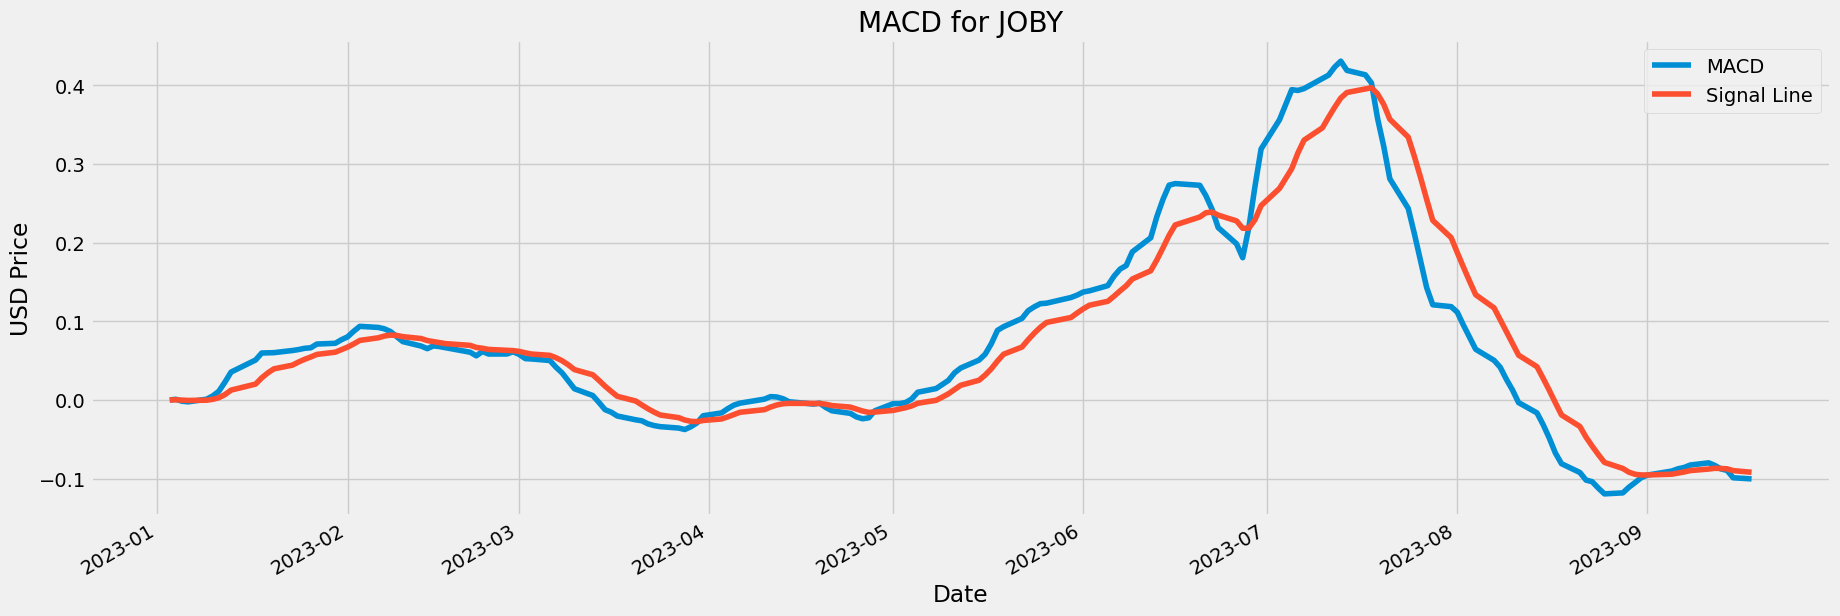

In [33]:
MACDinit(df)

### Determine when to buy/sell from MACD signals

In [34]:
#determine when to buy/sell from MACD
buysellMACD(df)
#create buy/sell column
a = buysellMACD(df)
df['Buy MACD Price'] = a[0]
df['Sell MACD Price'] = a[1]

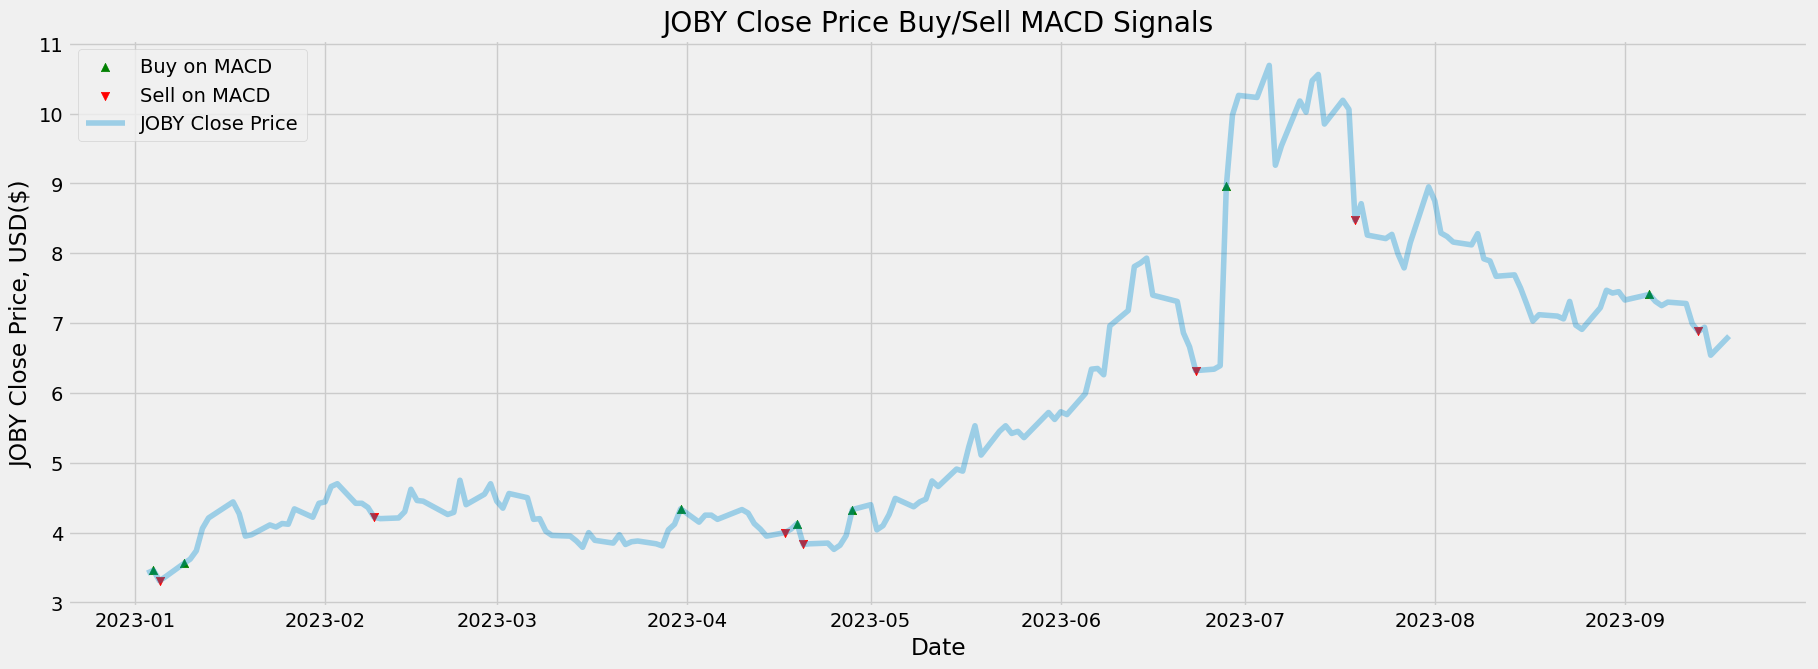

In [35]:
MACDbuysellsignals(df)

# **2. Simple Moving Average**<a name="Simple-Moving-Average"></a>

* SMA with Close Price

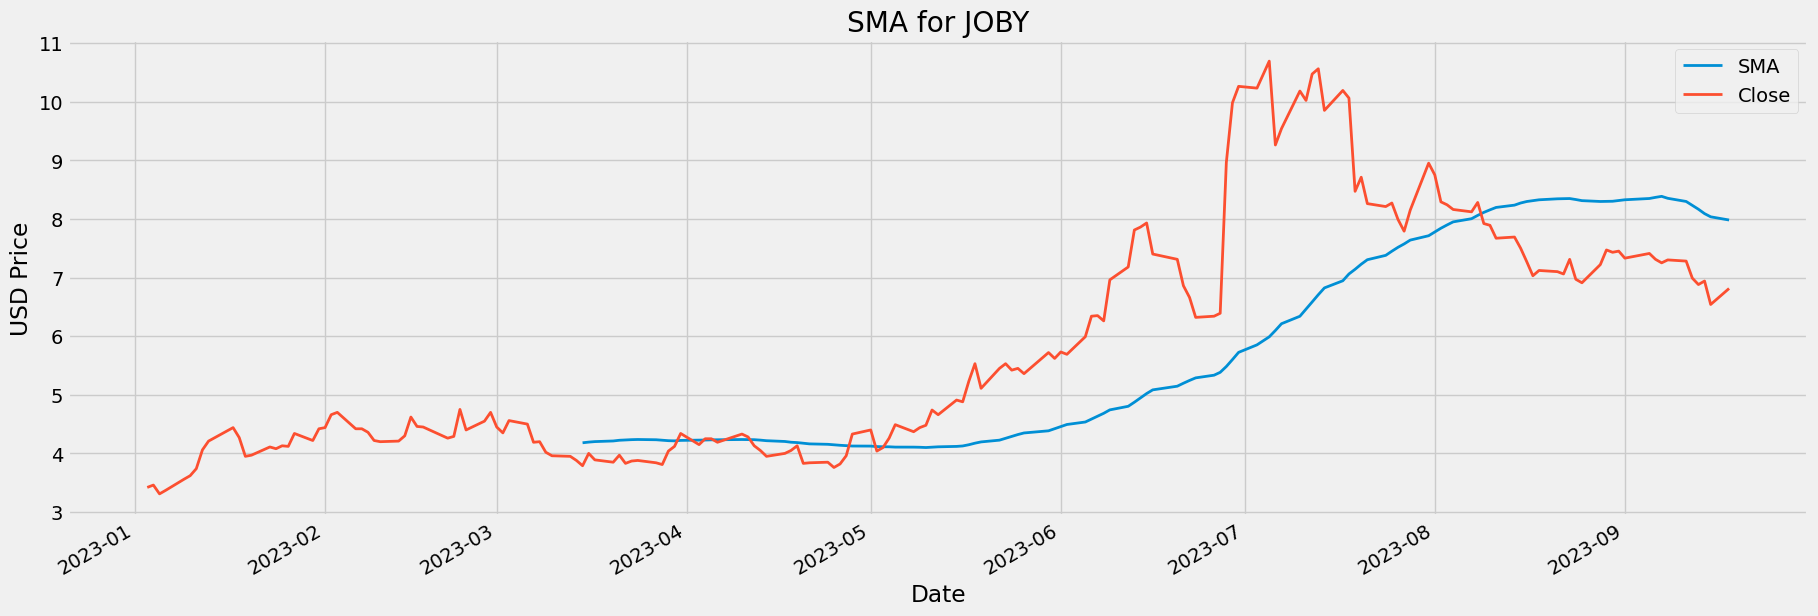

In [36]:
SMAinitplot(df)

# **3. Exponential Moving Average** <a name="exponential-moving-average"></a>

* EMA plot with close price
* EMA plot with close price (short and long)
* Buy and sell signals for EMA

#### EXPONENTIAL MOVING AVERAGE (EMA) ANALYSIS

---

#### BUY IF SHORT EMA > LONG EMA

### **Plot for Exponential Moving Average (EMA)**

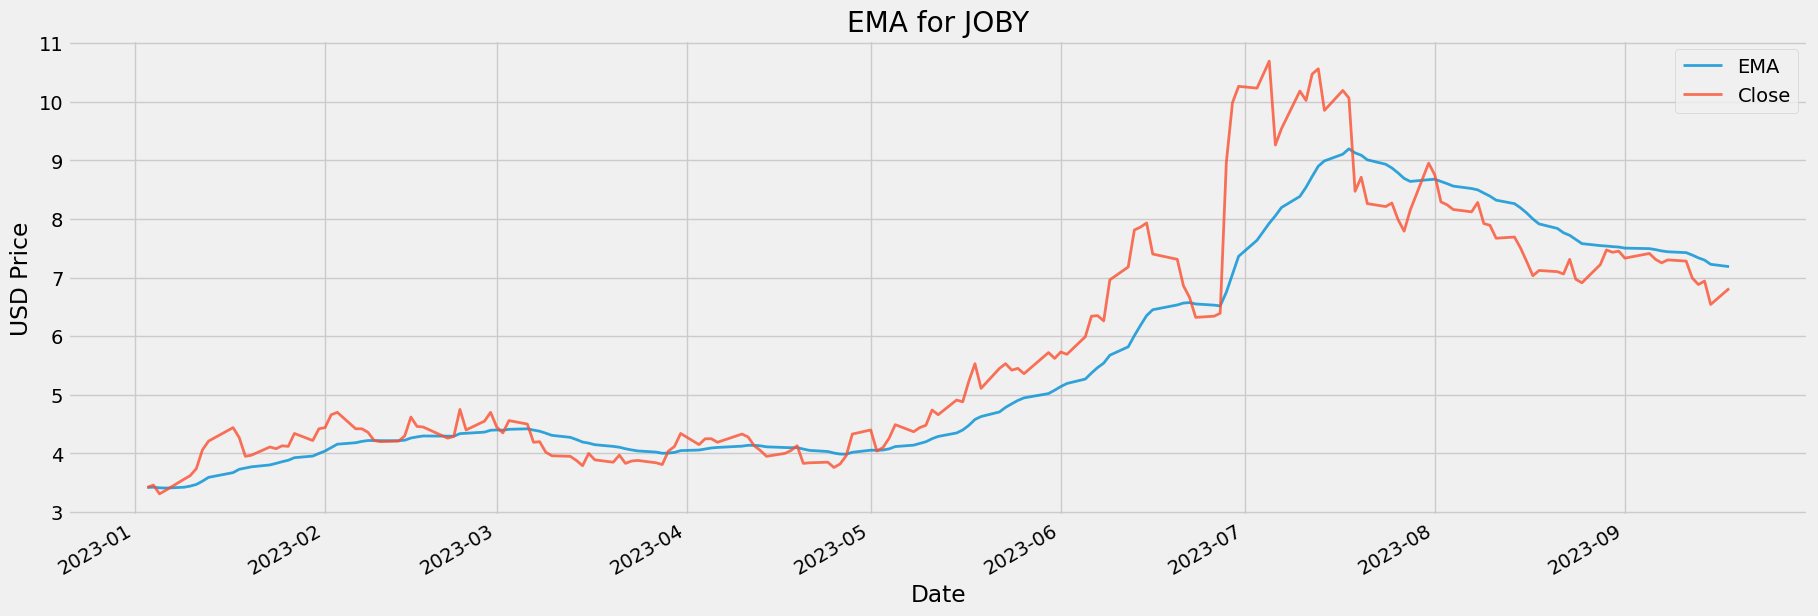

In [37]:
EMAinitplot(df)

### **Plot for Exponential Moving Average with short and long strategies**

In [38]:
#store the short EMA (20-day period) and tHE long term EMA (50-day period) into the data set
#buy when short term EMA crosses above long term EMA and sell when short term EMA crosses below long term EMA
df['EMA Short'] = EMA(df,20,'Close')
df['EMA Long'] = EMA(df,50,'Close')

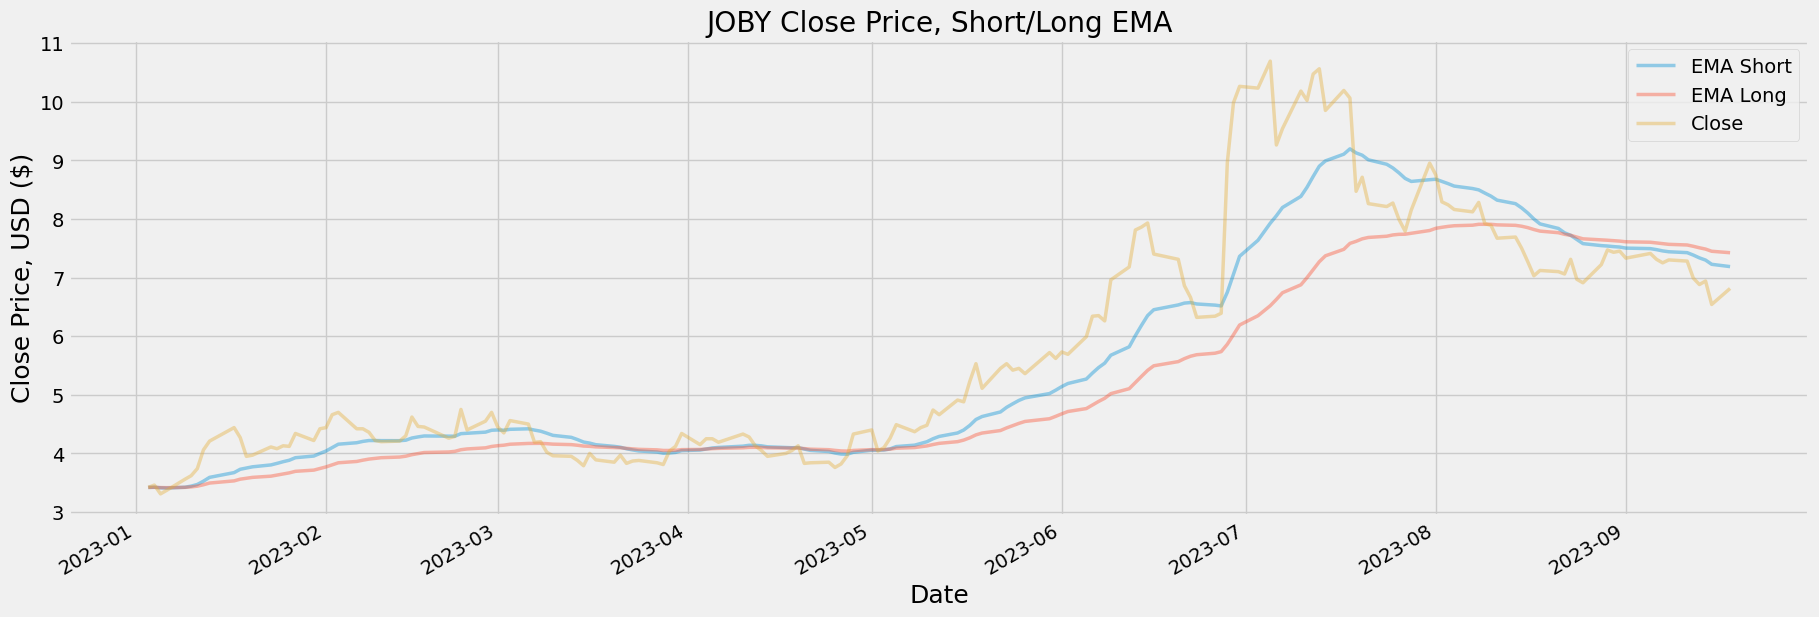

In [39]:
EMAinit(df)

# **Determine when to BUY/SELL from Exponential Moving Average signals**

In [40]:
#run EMA strategy to get buy and sell signals
EMAstrategy(df)

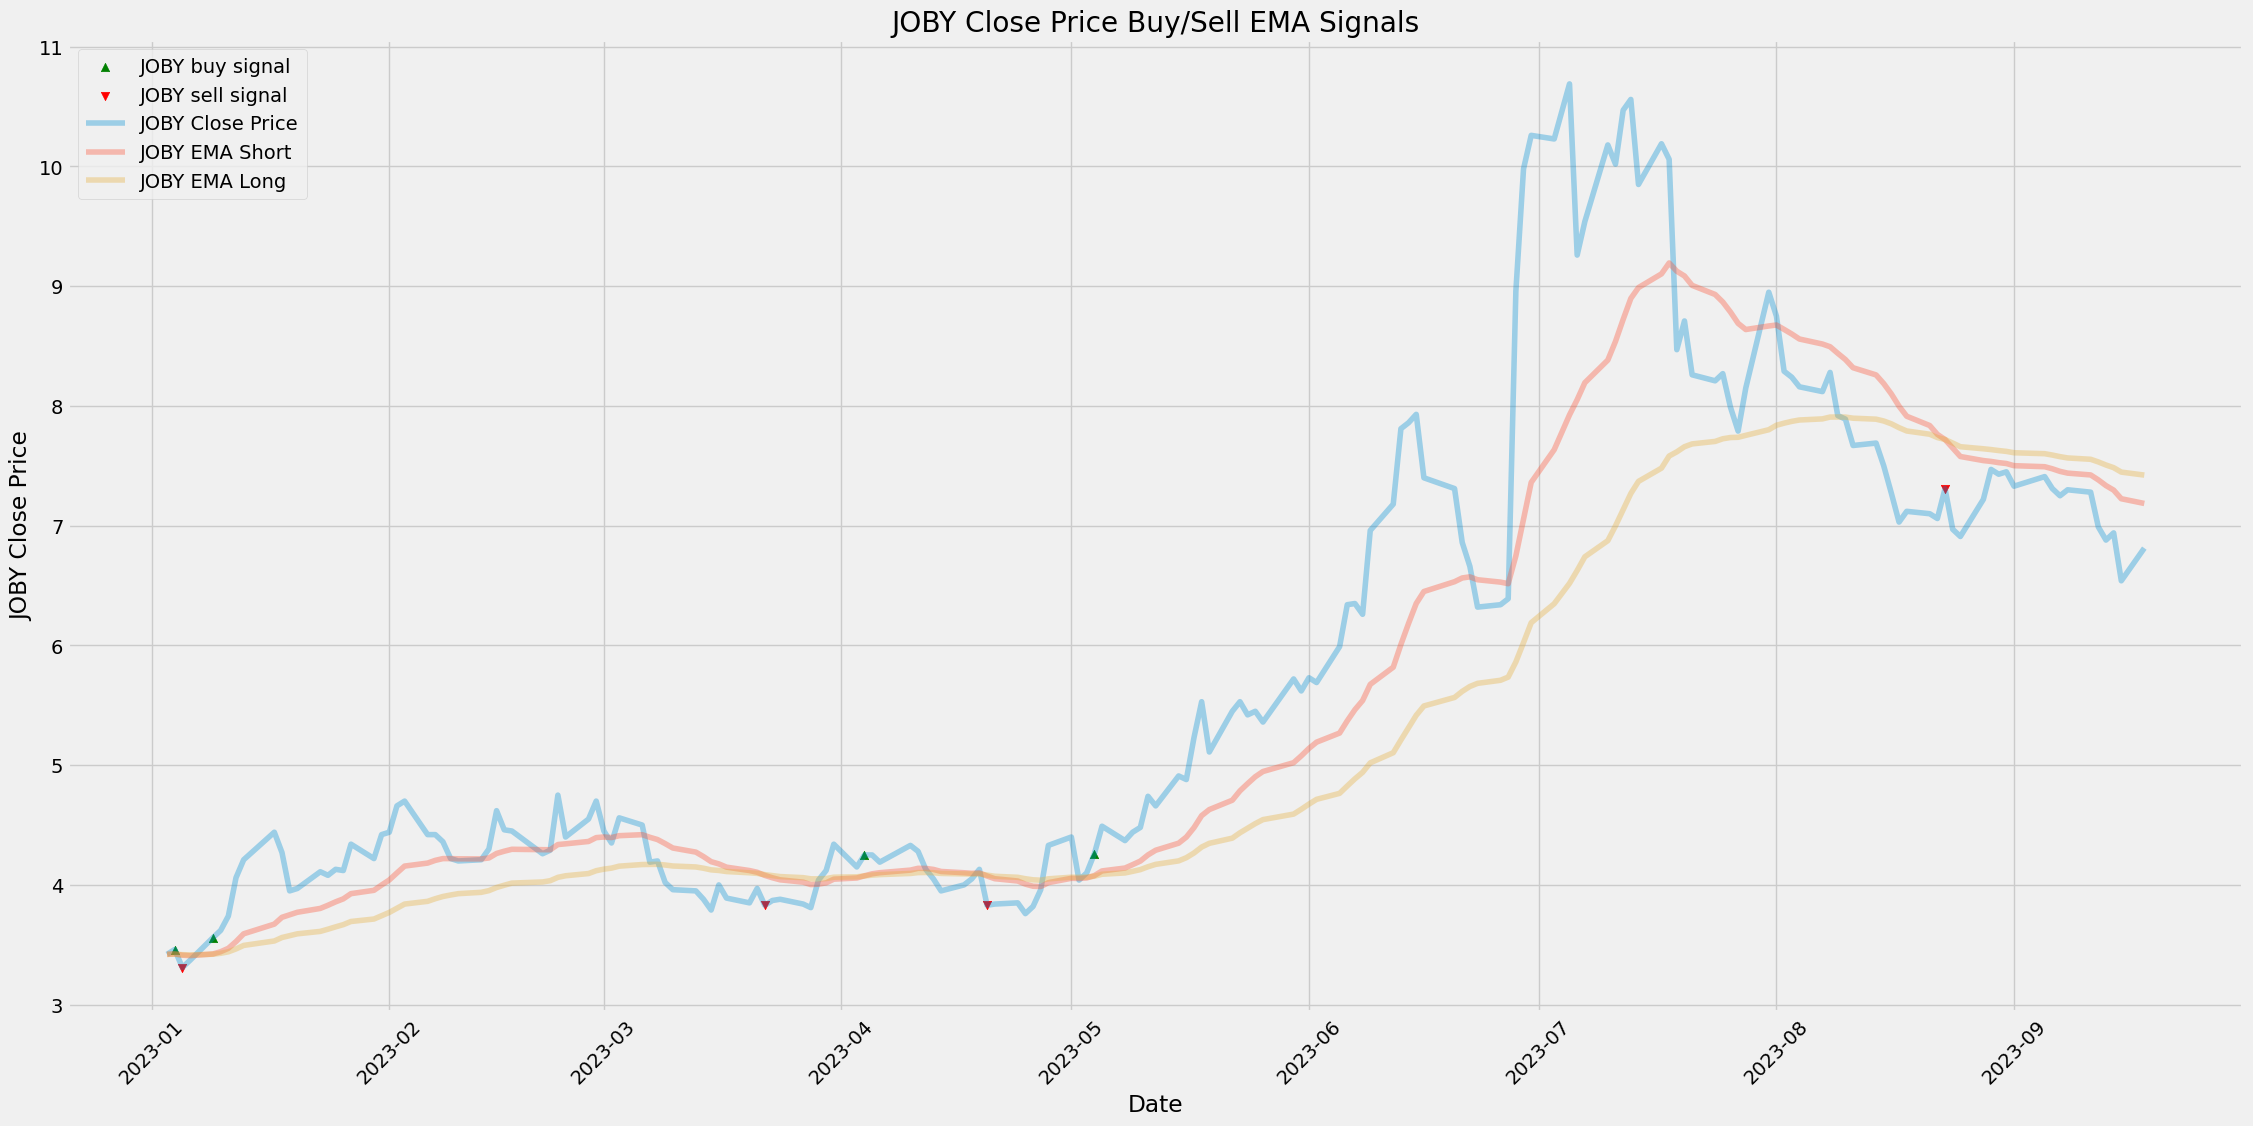

In [41]:
EMAbuysellplot(df)

# **4. Double Exponential Moving Average** <a name="Double Exponential Moving Average"></a>
* Plot with long and short DEMA
* Buy and sell signals

## DOUBLE EXPONENTIAL MOVING AVERAGE ANALYSIS

---


#### BUY IF SHORT TERM DEMA CROSSES ABOVE LONG TERM DEMA :: SHORT DEMA > LONG DEMA
#### SELL IF SHORT TERM DEMA CROSSES BELOW LONG TERM DEMA :: SHORT DEMA < LONG DEMA

In [42]:
#store the short DEMA (20-day period) and teh long term DEMA (50 day period) into the data set
#buy when short term DEMA crosses above long term DEMA and sell when short term DEMA crosses below long term DEMA
df['DEMA Short'] = DEMA(df,20,'Close')
df['DEMA Long'] = DEMA(df,50,'Close')
#plot the chart

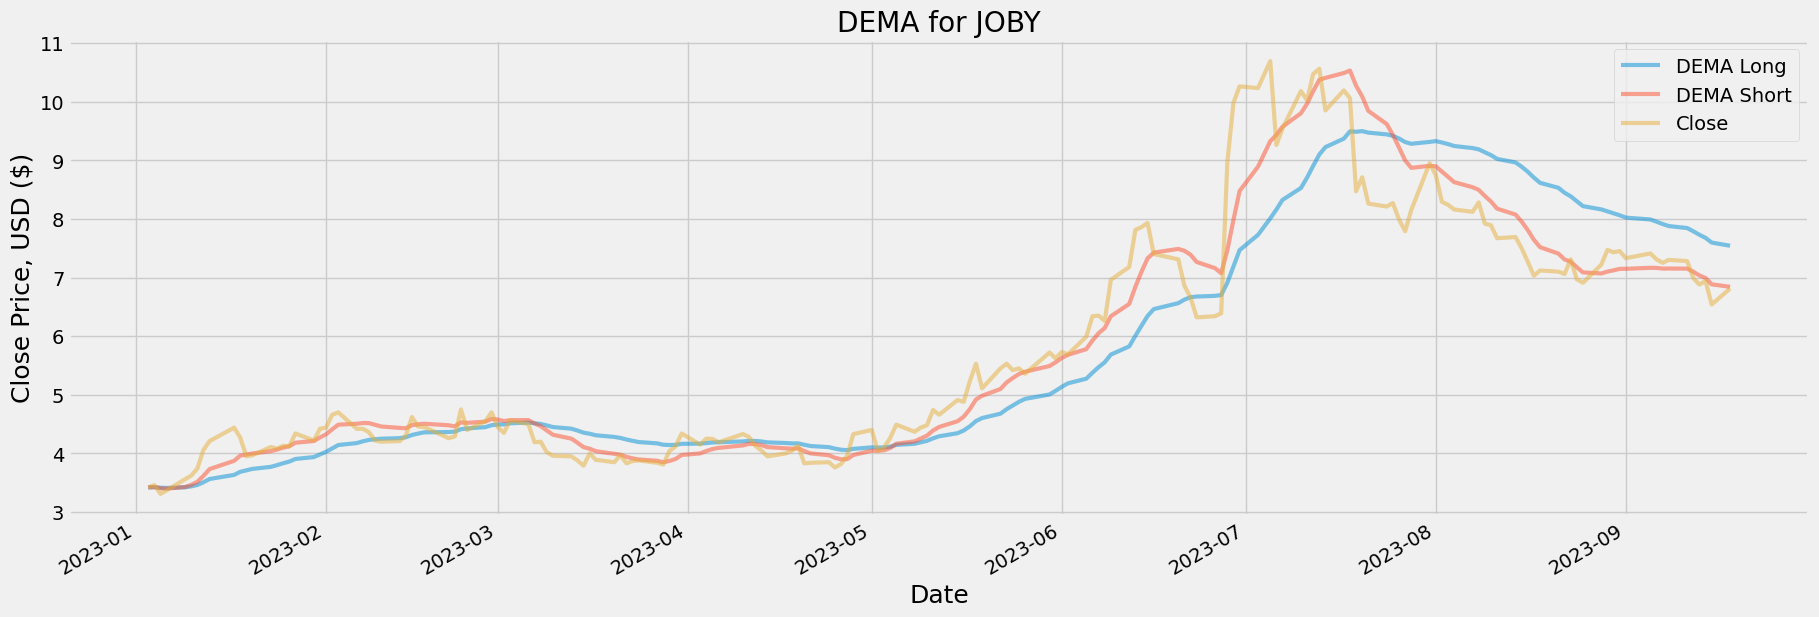

In [43]:
DEMAinit(df)

In [44]:
#run DEMA strategy to get buy and sell signals
DEMAstrategy(df)

###**Indicate when to BUY/SELL using double exponential moving average**

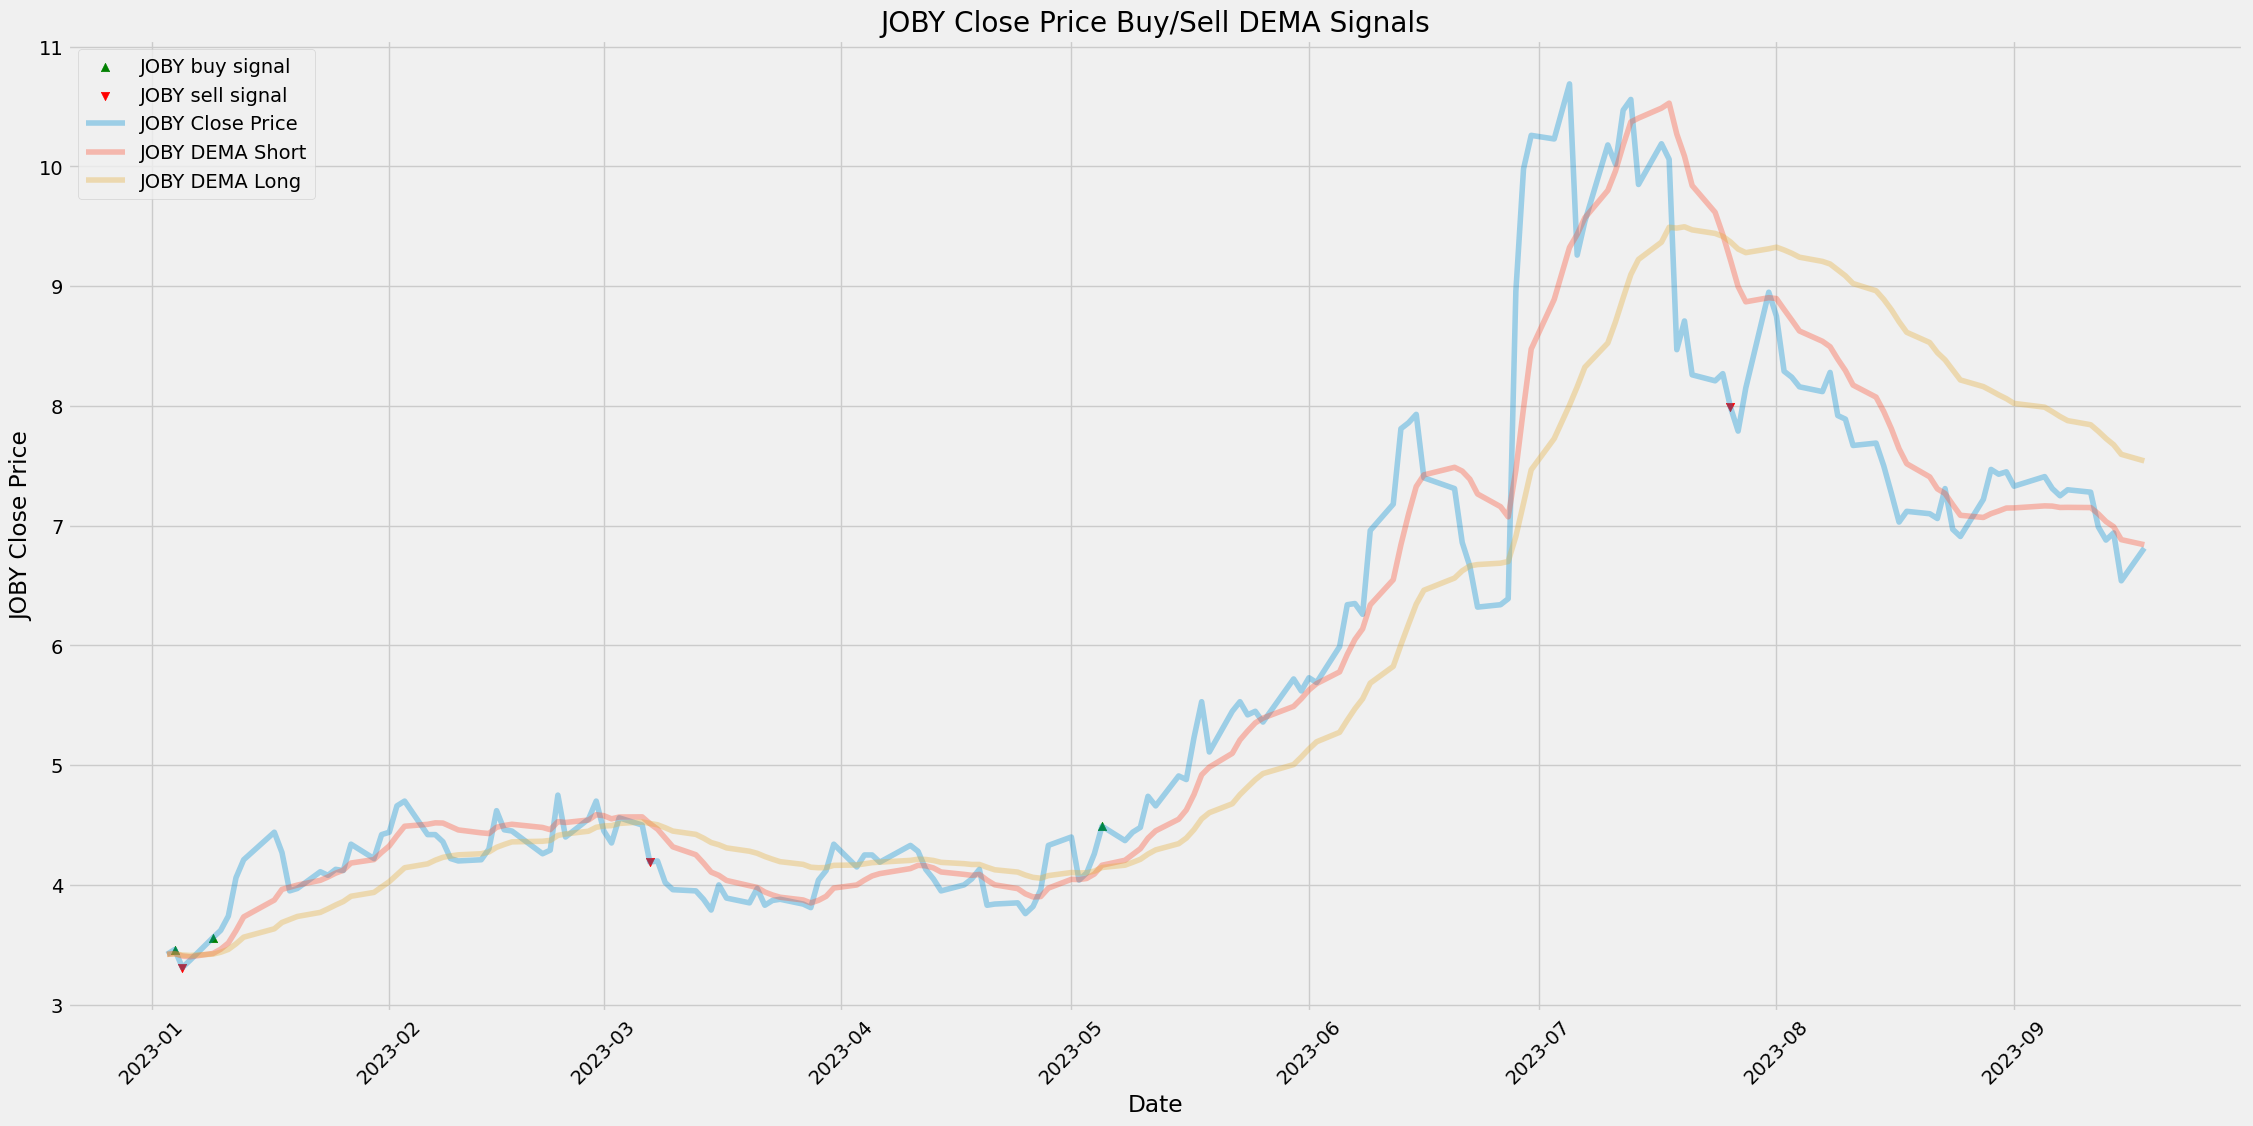

In [45]:
DEMAbuysellsignals(df)

# **5. Relative Strength Index or Money Flow Index** <a name="Relative-Strength-Index-or-Money-Flow-Index"></a>
* Generate RSI/MFI dataframe from adjusted close price history from Yahoo Finance
* Plot adjusted close prices for RSI/MFI
* Plot RSI/MFI

### **Generate RSI/MFI dataframe from adjusted close price history from Yahoo Finance**

### **Plot adjusted closes prices for RSI/MFI**

In [46]:
#create new df for adjusted RSI layering
newRSIdf = pd.DataFrame()
newRSIdf['RSI'] = RSI(df)
newRSIdf

,RSI
Date,
2023-01-03,NaN
2023-01-04,NaN
2023-01-05,NaN
2023-01-06,NaN
2023-01-09,NaN
...,...
2023-09-12,48.241202
2023-09-13,38.378382
2023-09-14,49.044594


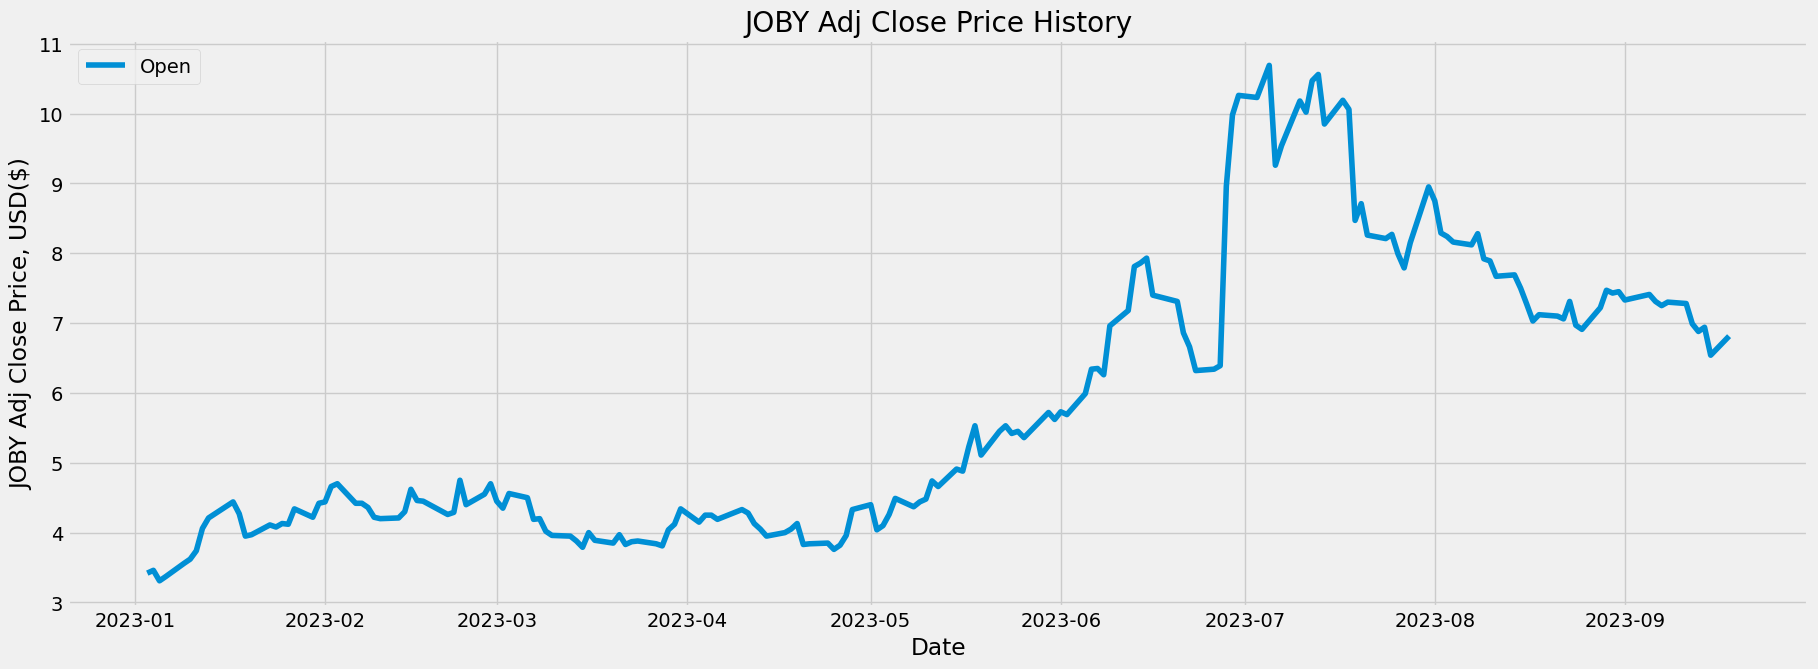

In [47]:
RSIinit(newRSIdf)

### **RSI Index**

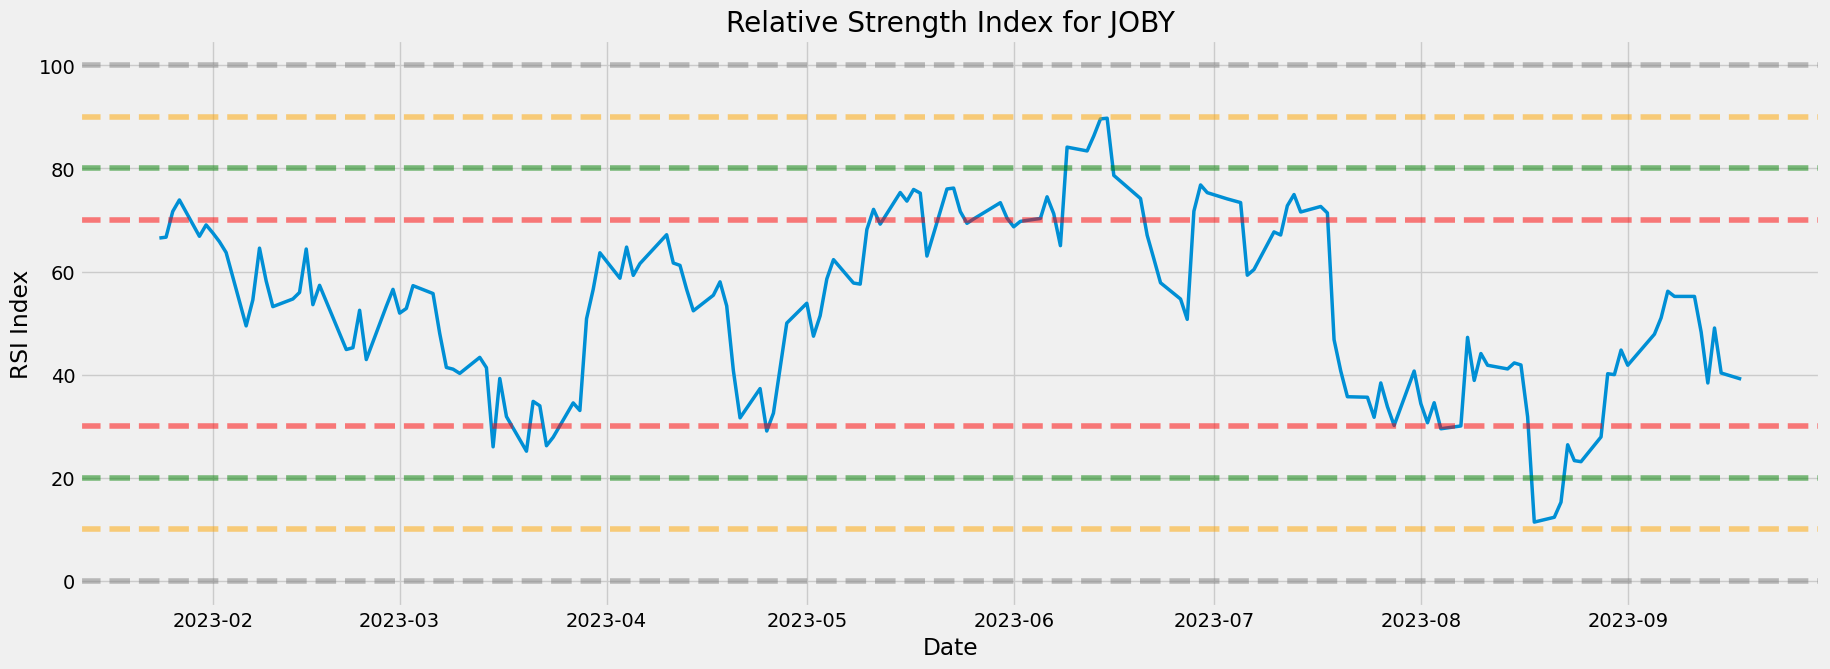

In [48]:
RSIplot(newRSIdf)

#**6. On-Balance Volume**<a name="On-Balance-Volume"></a>

* OBV superimposed with OBV_EMA

* Plot BUY/SELL signals

---

#### BUY IF OBV > OBV_EMA
#### SELL IF OBV < OBV_EMA

In [49]:
#create new columns in the dataframe (df) for OBV and OBV_EMA
df['OBV'] = OBV()
df['OBV_EMA'] = df['OBV'].ewm(span=20).mean()

In [50]:
def OBVplotinit(df):
  #plot OBV and OBV_EMA
  plt.figure(figsize=(25,12))
  plt.plot(df['OBV'],label='OBV', color='orange') #,LW=2
  plt.plot(df['OBV_EMA'],label='OBV_EMA', color='purple')
  plt.title('%s On-Balance Volume / OBV Exponential Moving Avg Chart'%str(tag))
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('%s OBV'%str(tag), fontsize=18)
  plt.legend(loc='upper left')
  plt.show()

### On-Balance Volume with exponential moving average

---

#### **Buy if OBV > OBV_EMA**

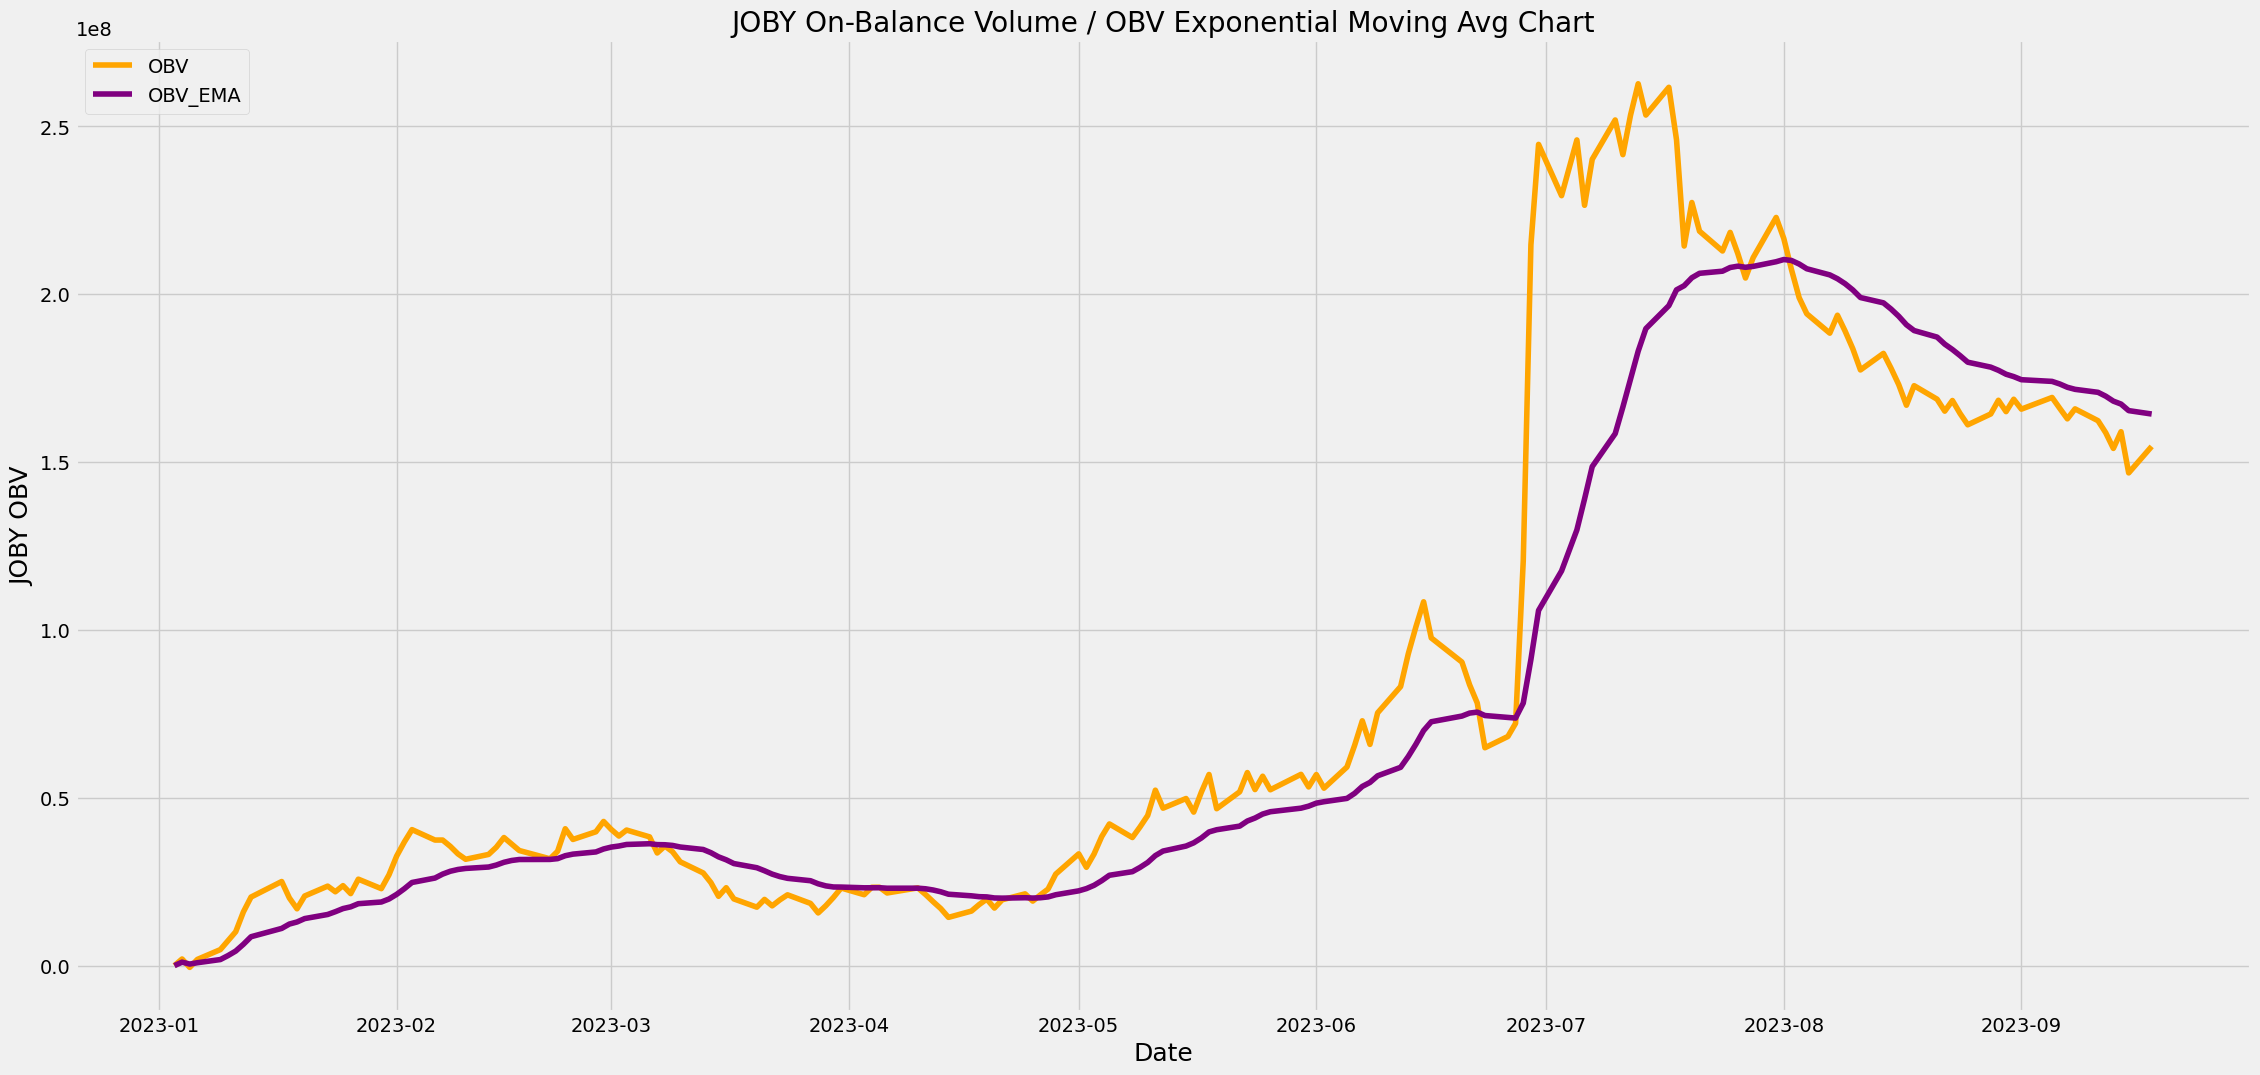

In [51]:
OBVplotinit(df)

In [52]:
#create new columns for buying/selling on OBV
x = OBVbuysell(df,'OBV','OBV_EMA')
df['buy OBV price'] = x[0]
df['sell OBV price'] = x[1]
#df[-60:]

## **BUY/SELL POSITIONS FROM ON-BALANCE VOLUME**

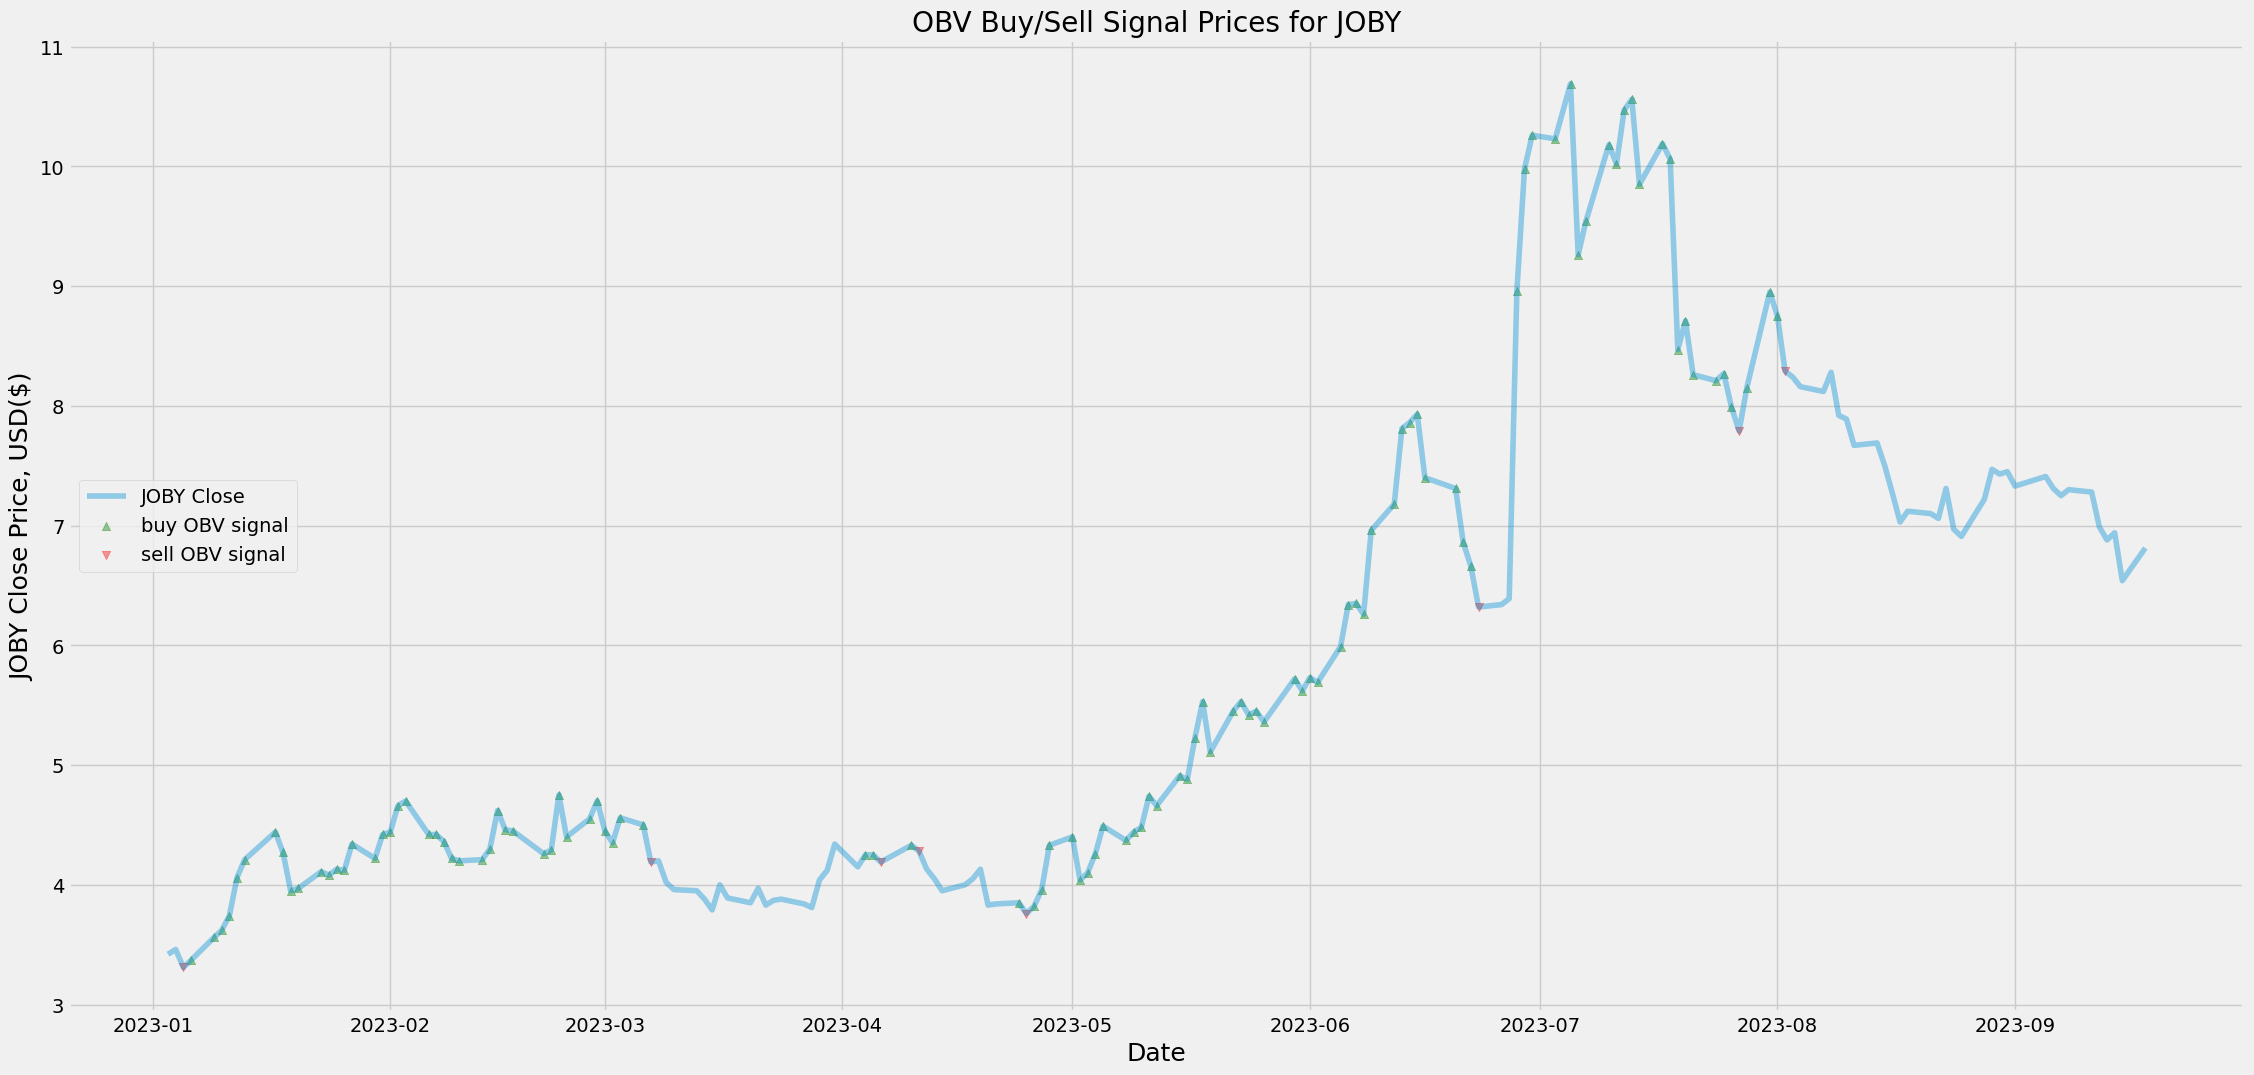

In [53]:
OBVbuysellplot(df)

# **7. Bollinger Bands Analysis** <a name="Bollinger-Bands-Analysis"></a>
* Plot Bollinger Band with a given period
* Formatted Bollinger Band plot
* plot buy/sell signals

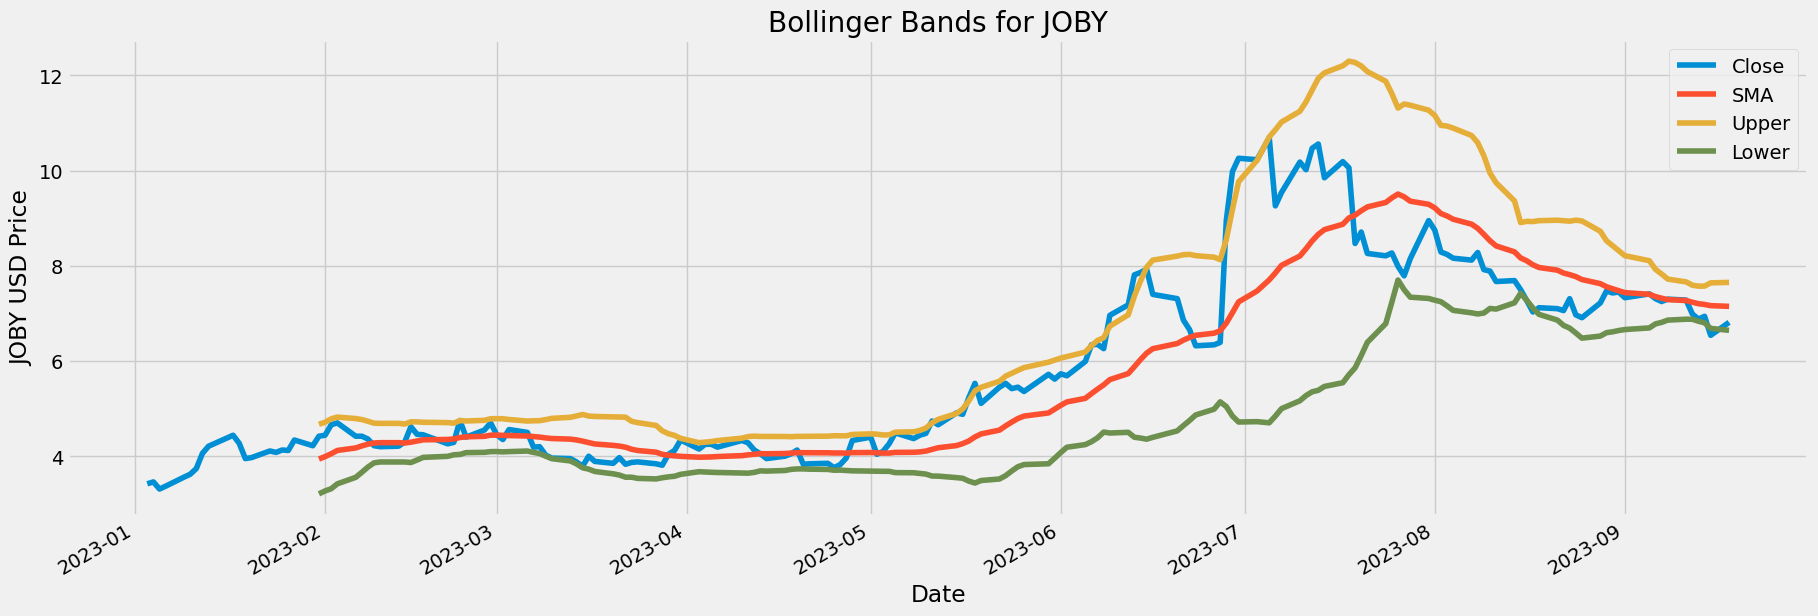

In [54]:
#get the time period (20 day)
period=20
BBsetup(df,period)

In [55]:
#create a new data frame, NOTE data has more entires!!!
newBBdf = df[period-1:] #from time period -1 to everything else
#newBBdf

## **Formatted Bollinger Band Plot**

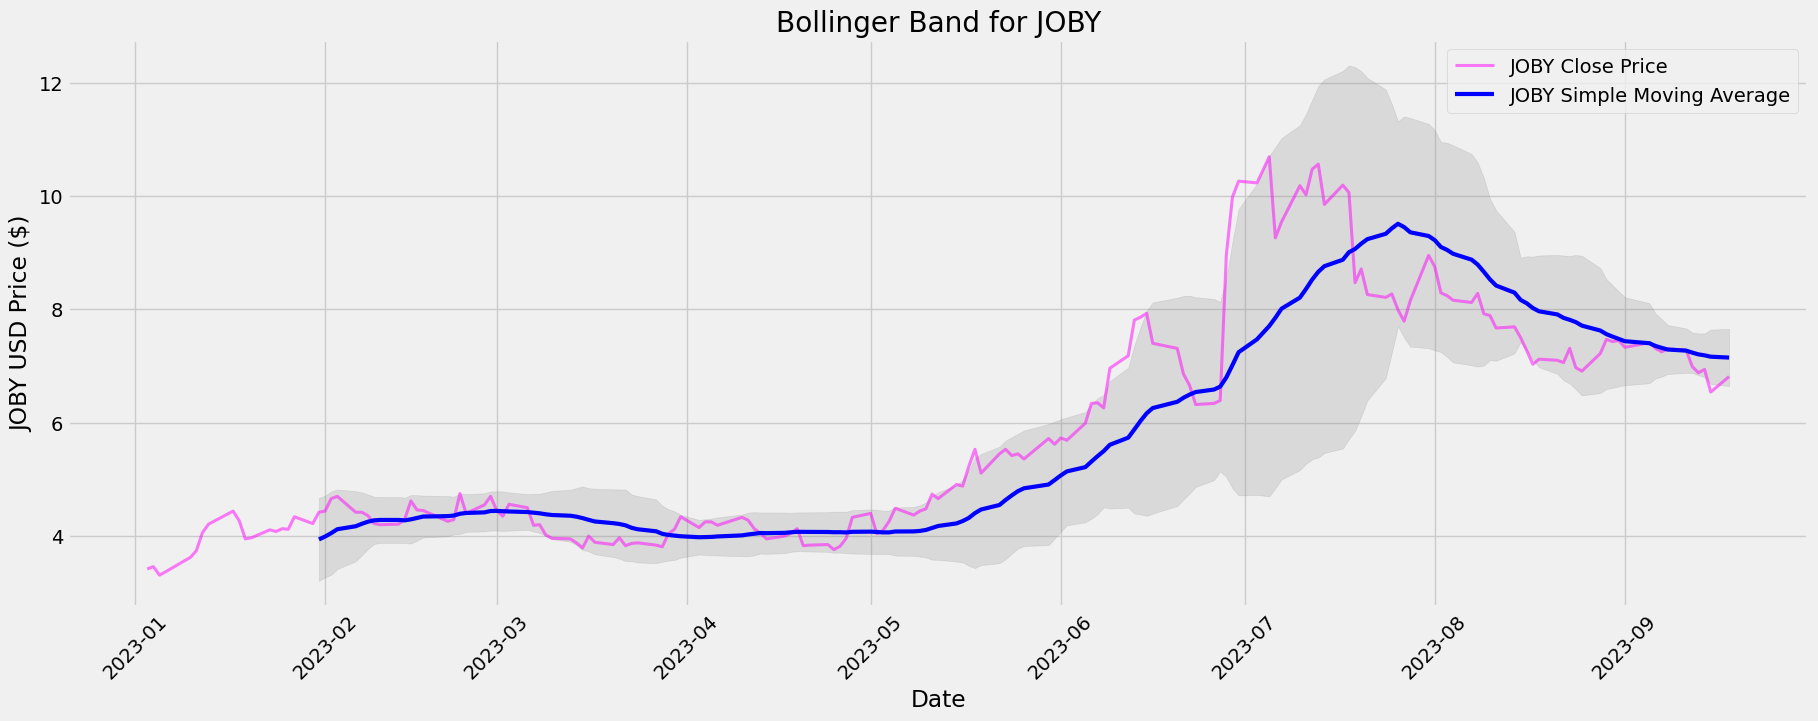

In [56]:
BBinit(df)

In [ ]:
#create two new columns for buy and sell signals on Bollinger Band Strategy
#newBBdf['Buy Price BB'] = getBBsig(newBBdf)[0]
#newBBdf['Sell Price BB'] = getBBsig(newBBdf)[1]

buy_BBsignal, sell_BBsignal = getBBsig(newBBdf)
newBBdf.loc[:, 'Buy Price BB'] = buy_BBsignal
newBBdf.loc[:, 'Sell Price BB'] = sell_BBsignal

#newBBdf

# Buy/sell signals for Bollinger Band Strategy

---

Key: Interested when price touches Bollinger Band envelope

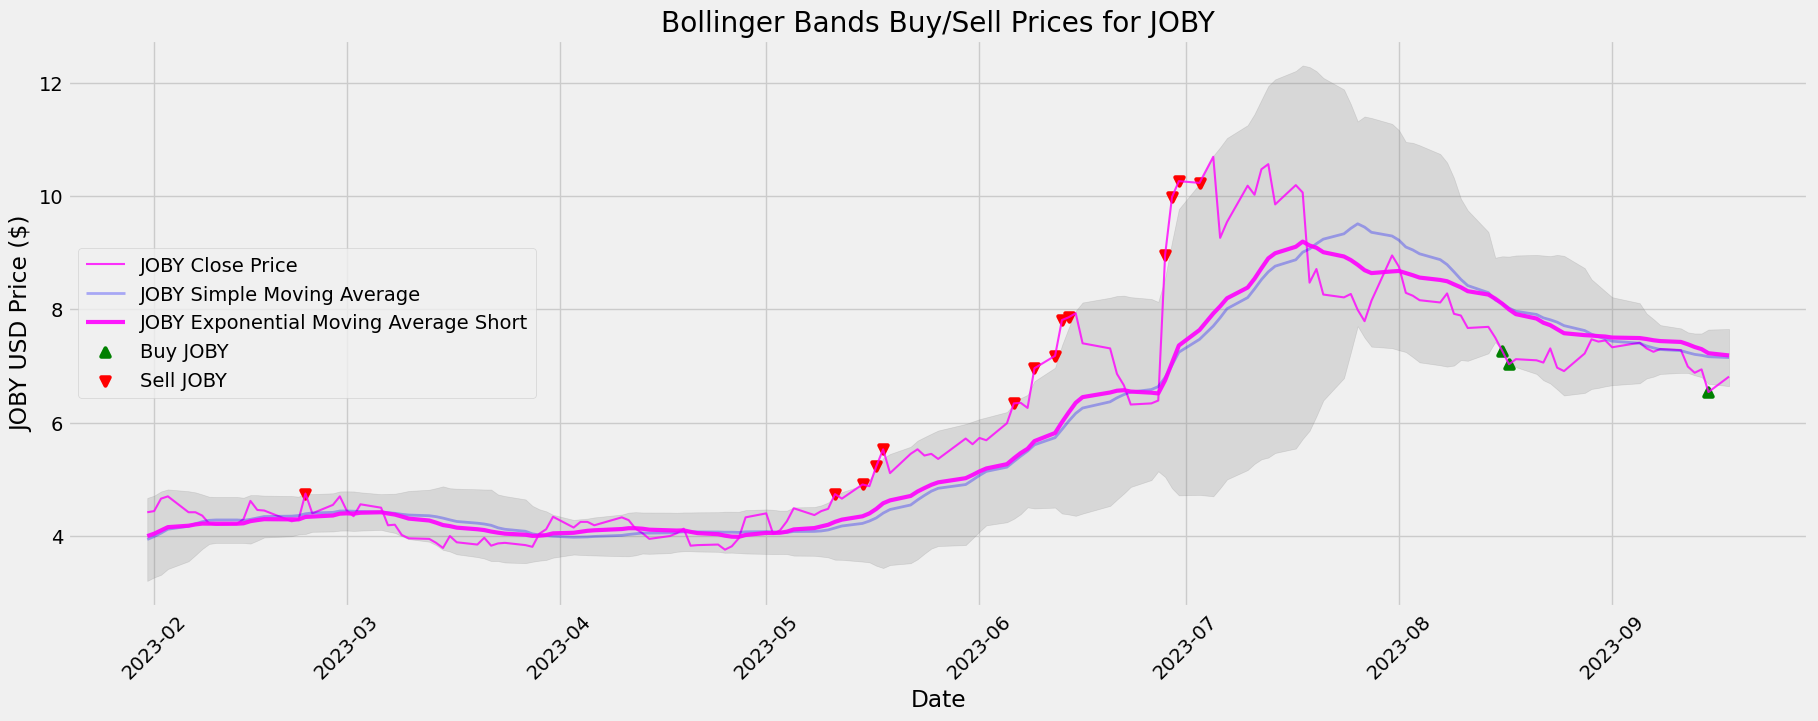

In [58]:
BBbuysellplot(newBBdf)

## **8. Exponential Moving Average 3X XOver / 3X Leveraged** <a name="Exponential-Moving-Average-3X-XOver-/-3X-Leveraged"></a>

* Create new columns in dataframe for buy/sell sinals
* Plot 3X Lever Trade with buy/sell signals

In [59]:
# Trade the 3X XOVER
# Create new columns for each leg in the existing dataframe (df)
shortema, midema, longema = lev3x(df)

In [60]:
df['Buy 3X Price'] = trade3xlever(df)[0]
df['Sell 3X Price'] =trade3xlever(df)[1]
df


,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,up,down,...,buy OBV price,sell OBV price,STD,Upper,Lower,Short,Mid,Long,Buy 3X Price,Sell 3X Price
Date,,,,,,,,,,,,,,,,,,,,,
2023-01-03,3.42,3.5690,3.340,3.4200,3.4200,3564500,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.420000,3.420000,3.420000,NaN,NaN
2023-01-04,3.44,3.5450,3.379,3.4600,3.4600,1977600,0.000847,0.000169,0.0400,0.00,...,NaN,NaN,NaN,NaN,NaN,3.433333,3.423636,3.421250,3.46,NaN
2023-01-05,3.45,3.5000,3.300,3.3100,3.3100,2506800,-0.001625,-0.000190,0.0000,-0.15,...,NaN,3.31,NaN,NaN,NaN,3.392222,3.413306,3.417774,NaN,3.31
2023-01-06,3.35,3.3700,3.220,3.3700,3.3700,2381800,-0.002414,-0.000634,0.0600,0.00,...,3.37,NaN,NaN,NaN,NaN,3.384815,3.409369,3.416281,3.37,NaN
2023-01-09,3.43,3.6100,3.390,3.5600,3.5600,2927100,0.000963,-0.000315,0.1900,0.00,...,3.56,NaN,NaN,NaN,NaN,3.443210,3.423063,3.420772,NaN,3.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-12,7.20,7.3100,6.980,6.9900,6.9900,3565600,-0.083215,-0.086908,0.0000,-0.29,...,NaN,NaN,0.178958,7.593416,6.877583,7.196524,7.397486,7.431872,NaN,NaN
2023-09-13,6.96,7.0450,6.870,6.8800,6.8800,4684700,-0.087688,-0.087064,0.0000,-0.11,...,NaN,NaN,0.184347,7.573195,6.835805,7.091016,7.350441,7.414626,NaN,NaN
2023-09-14,6.90,7.0000,6.780,6.9400,6.9400,4972100,-0.089547,-0.087560,0.0600,0.00,...,NaN,NaN,0.192753,7.573506,6.802494,7.040677,7.313129,7.399794,NaN,NaN


### **3X lever trade with buy/sell signals**

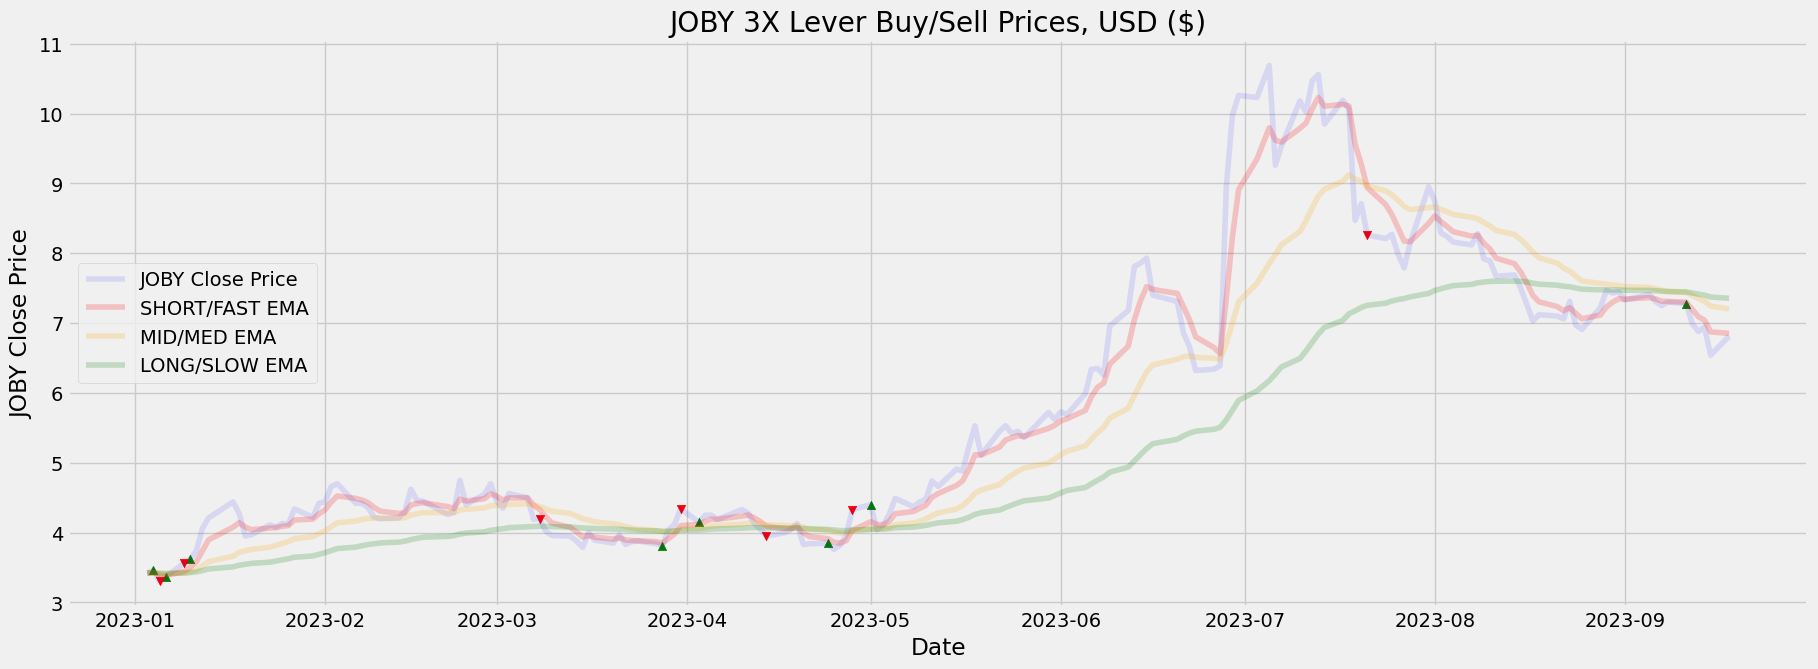

In [61]:
plot3xlever(df,shortema,midema,longema)